<a href="https://colab.research.google.com/github/nc142j/Amazon_Behaviors_Purchases/blob/V4/Amazon_Behaviors_Purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reginald Rhoe

Nehemiah Clark

Machine Learning Fundamentals

Project #2

Table of Contents

# 1. Introduction

This project aims to investigate customer purchase behavior using data from the Kaggle Amazon Purchase Behavior dataset. Specifically, we will focus on understanding the relationship between purchase frequency and demographic factors like age and gender. We will explore two machine learning techniques:

* **Deep Neural Network (DNN) with PCA :** We will use a Deep Neural Network in conjunction with Principal Component Analysis (PCA) to potentially classify or understand patterns related to purchase frequency based on a set of features. PCA will be used to reduce the dimensionality of the data while retaining most of its variance, which can sometimes improve DNN performance and training speed, especially on tabular data. The objective here is to build a model that can learn complex relationships in the reduced feature space and potentially predict or classify purchase frequency levels.

* **K-Means Clustering:** We will apply the K-Means clustering algorithm to segment customers based on their characteristics and purchase behavior. The objective is to identify distinct groups of customers who exhibit similar purchase frequencies when analyzed alongside age and gender. This unsupervised approach will help uncover natural groupings within the customer base without prior knowledge of those groups.

By comparing the insights gained from the DNN with PCA approach (which can potentially predict or classify) and the K-Means clustering approach (which identifies natural segments), we aim to gain a deeper understanding of how age and gender influence purchase frequency and identify distinct customer segments for further analysis or targeted strategies.

This link contains record data from [Kaggle Amazon Purchase Behavior ](https://www.kaggle.com/code/moussadoumbiya/amazon-consumer-behaviour-analysis).

# 2. Data Content

About this Dataset

```

```

1.age= age

2.gender= gender

3.Purchase_Frequency= How frequently do you make purchases on Amazon?

4.Purchase_Categories= What product categories do you typically purchase on Amazon?

5.Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon?

6.Browsing_Frequency =How often do you browse Amazon's website or app?

7.Product_Search_Method =How do you search for products on Amazon?

8.Search_Result_Exploration =Do you tend to explore multiple pages of search results or focus on the first page?

9.Customer_Reviews_Importance =How important are customer reviews in your decision-making process?

10.Add_to_Cart_Browsing =Do you add products to your cart while browsing on Amazon?

11.Cart_Completion_Frequency =How often do you complete the purchase after adding products to your cart?

12.Cart_Abandonment_Factors =What factors influence your decision to abandon a purchase in your cart?

13.Saveforlater_Frequency =Do you use Amazon's "Save for Later" feature, and if so, how often?

14.Review_Left =Have you ever left a product review on Amazon?
15.Review_Reliability =How much do you rely on product reviews when making a purchase?

16.Review_Helpfulness =Do you find helpful information from other customers' reviews?

17.Personalized_Recommendation_Frequency =How often do you receive personalized product recommendations from Amazon?

18.Recommendation_Helpfulness =Do you find the recommendations helpful?

19.Rating_Accuracy =How would you rate the relevance and accuracy of the recommendations you receive

20.Shopping_Satisfaction =How satisfied are you with your overall shopping experience on Amazon?

23.Service_Appreciation =What aspects of Amazon's services do you appreciate the most?

24.Improvement_Areas =Are there any areas where you think Amazon can improve?

# 3. Python Libraries

In [979]:
from google.colab import auth
from googleapiclient.discovery import build
import pandas as pd
import io
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Unity/Common Python Functions

The function sytled_dataframe_header basiscally is a utility function to style the headers of dataframes.

In [980]:
def styled_dataframe_header(df):
  # Apply a CSS style to the table header of the head
  display(df.style.set_table_styles([{
    'selector': 'th',  # Selects table header cells
    'props': [('background-color', 'lightblue')]
}]))

In [981]:
auth.authenticate_user()
drive_service = build('drive', 'v3')

file_id = '1PSHCQ6KhzjK-hHs9hTm_89kbEwUM1efS'
request = drive_service.files().get_media(fileId=file_id)
response = request.execute()

df = pd.read_csv(io.BytesIO(response))

print('\n Inital head Dataframe')
display(styled_dataframe_header(df.head()))
print('\n Inital tail Dataframe')
display(styled_dataframe_header(df.tail()))


 Inital head Dataframe


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;others,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


None


 Inital tail Dataframe


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,Sometimes,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;others,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,others,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy
601,2023/06/16 9:16:05 AM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Multiple times a day,Keyword,Multiple pages,3,Maybe,Often,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,3,Product recommendations,Product quality and accuracy


None

# 4. Data Analysis

In [982]:
df.shape

(602, 23)

In [983]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [984]:
# Calculate null counts
null_counts = df.isnull().sum()

# Convert the Series to a DataFrame
null_counts_df = null_counts.reset_index()

# Rename the columns
null_counts_df.columns = ['Features', 'Null Count']

# Display the DataFrame with the updated column name
print("\nNull Counts by Feature:")

display(styled_dataframe_header(null_counts_df))


Null Counts by Feature:


,Features,Null Count
0,Timestamp,0
1,age,0
2,Gender,0
3,Purchase_Frequency,0
4,Purchase_Categories,0
5,Personalized_Recommendation_Frequency,0
6,Browsing_Frequency,0
7,Product_Search_Method,2
8,Search_Result_Exploration,0
9,Customer_Reviews_Importance,0


None

In [985]:
# Check if gender_counts exists and is a pandas Series
if 'gender_counts' in locals() and isinstance(gender_counts, pd.Series):

    rename_dict = {}

    # Get the index of the gender_counts Series (the gender labels)
    gender_labels = gender_counts.index

    # Create a mapping from gender labels to numbers
    # You can assign numbers in any order, for example:
    # 0 for the first gender in the index, 1 for the second, etc.
    gender_mapping = {label: i for i, label in enumerate(gender_labels)}

    print("\nMapping of Gender to Numbers:")
    print(gender_mapping)

    # If you want to apply this mapping back to your original DataFrame 'df'
    # to create a new numerical column representing the gender, you can do:
    if 'df' in locals() and isinstance(df, pd.DataFrame) and 'Gender' in df.columns:
        df['Gender_numeric'] = df['Gender'].map(gender_mapping)
        if 'Gender_numeric' in df.columns:
          rename_dict['Gender_numeric'] = 'Gender_mapping'
        elif 'Gender_numeric_1_4' in df.columns:
          rename_dict['Gender_numeric_1_4'] = 'Gender_mapping'
        else:
          print("\nNeither 'Gender_numeric' nor 'Gender_numeric_1_4' found. Cannot rename Gender column.")
        print("\nDataFrame with new 'Gender_mapping' column:")
    else:
        print("\nCould not find DataFrame 'df' or 'Gender' column to add numeric gender mapping.")

    # Perform the renaming if there are columns to rename
    if rename_dict:
        df.rename(columns=rename_dict, inplace=True)
        # print("\nDataFrame after renaming numerical columns:")
        # display(styled_dataframe_header(df.head()))

        # Assuming 'df' is your DataFrame and 'Gender_mapping' is the newly added column

        if 'Gender_mapping' in df.columns:
            print("\nDisplaying the 'Gender_mapping' column added to the DataFrame:")
            display(styled_dataframe_header(df[['Gender_mapping']].head()))
            print("Head of 'Gender_mapping' column")
            print("\n...")
            display(styled_dataframe_header(df[['Gender_mapping']].tail()))
            print("Tail of 'Gender_mapping' column")
        else:
            print("\n'Gender_mapping' column not found in the DataFrame.")

else:
    print("\ngender_counts not found or is not a pandas Series. Cannot create numeric mapping.")





Mapping of Gender to Numbers:
{'Female': 0, 'Male': 1, 'Prefer not to say': 2, 'Others': 3}

DataFrame with new 'Gender_mapping' column:

Displaying the 'Gender_mapping' column added to the DataFrame:


,Gender_mapping
0,0
1,0
2,2
3,0
4,0


None

Head of 'Gender_mapping' column

...


,Gender_mapping
597,0
598,0
599,0
600,0
601,0


None

Tail of 'Gender_mapping' column




*   **Note:**The intentions here was to show the new mappings of the gender columns for later compututions. Each gender type is mapped to a number 0-3.




Number of males,females, prefer not to say, and others:
Gender
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: count, dtype: int64


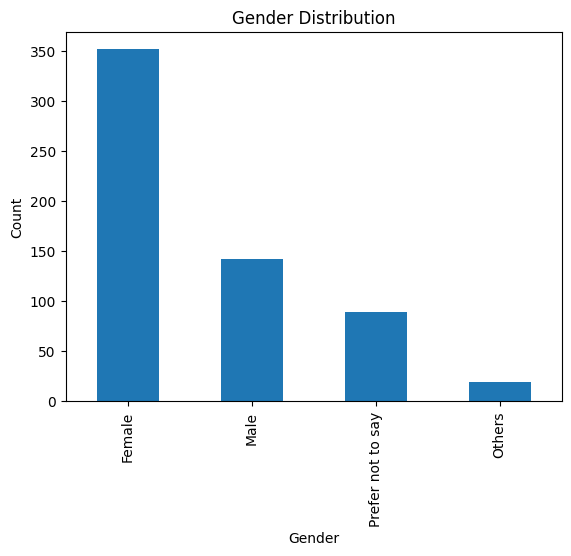

In [986]:
# Check if df exists, is a DataFrame, and has a 'Gender' column
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None and 'Gender' in df.columns:

    # Count the occurrences of each gender
    gender_counts = df['Gender'].value_counts()

    print("\nNumber of males,females, prefer not to say, and others:")
    print(gender_counts)

    # You can also display this as a simple plot if you have plotting libraries imported
    gender_counts.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

else:
    print("\df not found, is not a DataFrame, is None, or does not contain a 'Gender' column. Cannot show gender distribution.")



*   **Note:** Looking at the chart, most of the purchasers will be female so gender will play a big part of the analysis for predictions reasons later.




In [987]:
# Check if df exists, is a DataFrame, and has an 'age' column
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None and 'age' in df.columns:
    # Find the minimum age
    youngest_age = df['age'].min()

    # Find the maximum age
    oldest_age = df['age'].max()

    print(f"\nYoungest age: {youngest_age}")
    print(f"Oldest age: {oldest_age}")

else:
    print("\ndf not found, is not a DataFrame, is None, or does not contain an 'age' column. Cannot determine youngest and oldest ages.")


Youngest age: 3
Oldest age: 67



Distribution of age ranges:
age_group
3-10       1
11-18     19
19-26    282
27-34    126
35-42     73
43-50     72
51-58     21
59-66      6
67-74      2
Name: count, dtype: int64


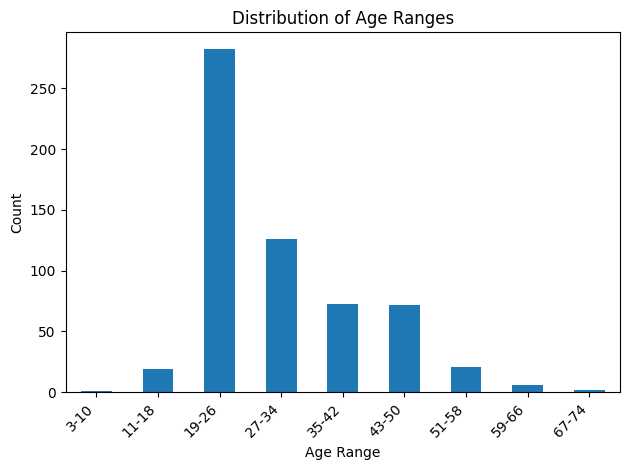

In [988]:
# Check if df exists, is a DataFrame, and has an 'age' column
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None and 'age' in df.columns:

    # Define the age range and bin size
    min_age = 3
    max_age = 68 # Updated max age to 68
    bin_size = 8

    # Create age bins
    bins = range(min_age, max_age + bin_size, bin_size)
    labels = [f'{i}-{i+bin_size-1}' for i in bins[:-1]]

    # Categorize ages into bins
    # Include rightmost edge of bins with 'right=True'
    # Use 'include_lowest=True' to include the minimum value in the first bin
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False, include_lowest=True)


    # Count the occurrences in each age group
    age_group_counts = df['age_group'].value_counts().sort_index()

    print("\nDistribution of age ranges:")
    print(age_group_counts)

    # Plot the distribution
    age_group_counts.plot(kind='bar')
    plt.title('Distribution of Age Ranges')
    plt.xlabel('Age Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

else:
    print("\ndf not found, is not a DataFrame, is None, or does not contain an 'age' column. Cannot create age distribution graph.")



*  **Note:** age ranges 19-26 have a significantly higher purchase frequenc than the other groups. This will be important for predicting later on.




In [989]:
# Check if age_group_counts exists and is a pandas Series
if 'age_group_counts' in locals() and isinstance(age_group_counts, pd.Series):

    rename_dict = {}

    # Get the index of the age_group_counts Series (the age group labels)
    age_group_labels = age_group_counts.index

    # Create a mapping from age group labels to numbers 1-9
    age_group_mapping = {label: i + 1 for i, label in enumerate(age_group_labels)}

    print("\nMapping of Age Groups to Numbers 1-9:")
    print(age_group_mapping)

    if 'df' in locals() and isinstance(df, pd.DataFrame) and 'Gender' in df.columns:
        df['age_group_numeric'] = df['age_group'].map(age_group_mapping)
        if 'age_group_numeric' in df.columns:
          rename_dict['age_group_numeric'] = 'age_group_mapping'
        elif 'age_group_numeric_1_9' in df.columns:
          rename_dict['age_group_numeric_1_9'] = 'age_group_mapping'
        else:
          print("\nNeither 'age_group_numeric' nor 'age_group_numeric_1_9' found. Cannot rename age_group column.")
        #print("\nDataFrame with new 'age_group__mapping' column:")

    else:
        print("\nCould not find DataFrame 'df' or 'age_group' column to add numeric age group mapping.")

    # Perform the renaming if there are columns to rename
    if rename_dict:
      df.rename(columns=rename_dict, inplace=True)
    #   print("\nDataFrame after renaming numerical columns:")
    #   display(styled_dataframe_header(df.head()))
      # Check if df exists, is a DataFrame, and has 'age_group' and 'age_group_mapping' columns
      #if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None and 'age_group' in df.columns and 'age_group_mapping' in df.columns:

      # Select only the desired columns
      age_mapping_df = df[['age_group', 'age_group_mapping']]

      print("\nTable showing age_group and its corresponding age_group_mapping:")
      # Display the selected columns using the styled_dataframe_header function
      display(styled_dataframe_header(age_mapping_df.head()))
      print("Head of age_group and age_group_mapping table")
      print("\n...")
      display(styled_dataframe_header(age_mapping_df.tail()))
      print("Tail of age_group and age_group_mapping table")

      # else:
      #     print("\nDataFrame 'df' not found, is not a DataFrame, is None, or does not contain 'age_group' or 'age_group_mapping' columns. Cannot display the requested table.")


else:
    print("\nage_group_counts not found or is not a pandas Series. Cannot create numeric mapping.")


Mapping of Age Groups to Numbers 1-9:
{'3-10': 1, '11-18': 2, '19-26': 3, '27-34': 4, '35-42': 5, '43-50': 6, '51-58': 7, '59-66': 8, '67-74': 9}

Table showing age_group and its corresponding age_group_mapping:


,age_group,age_group_mapping
0,19-26,3
1,19-26,3
2,19-26,3
3,19-26,3
4,19-26,3


None

Head of age_group and age_group_mapping table

...


,age_group,age_group_mapping
597,19-26,3
598,19-26,3
599,19-26,3
600,19-26,3
601,19-26,3


None

Tail of age_group and age_group_mapping table




*   **Note:**The intention here was to show that age_groups are mapped and to be used later in computions.



<ipython-input-990-2791268505>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchase_frequency = df.groupby('age_group')['Purchase_Frequency'].count().reset_index()


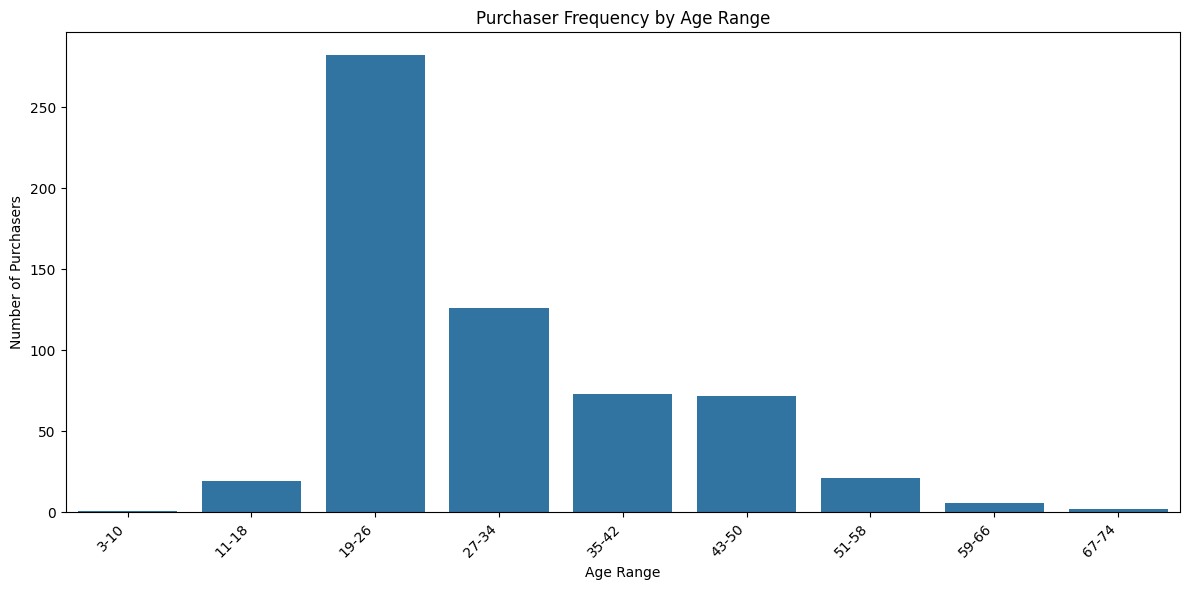

In [990]:
# Check if df exists and has the 'age_group' column
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None and 'age_group' in df.columns:

    # Group by the 'age_group' column and count the occurrences
    age_group_purchase_frequency = df.groupby('age_group')['Purchase_Frequency'].count().reset_index()

    # Rename the count column for clarity
    age_group_purchase_frequency.rename(columns={'Purchase_Frequency': 'Purchase Count'}, inplace=True)

    # Sort by age group (important for correct plotting order)
    # This requires converting the 'age_group' labels to a categorical type with the correct order
    age_group_order = df['age_group'].cat.categories
    age_group_purchase_frequency['age_group'] = pd.Categorical(
        age_group_purchase_frequency['age_group'],
        categories=age_group_order,
        ordered=True
    )
    age_group_purchase_frequency = age_group_purchase_frequency.sort_values(by='age_group')


    # Create a bar plot to visualize the relationship
    plt.figure(figsize=(12, 6)) # Adjust figure size as needed
    sns.barplot(x='age_group', y='Purchase Count', data=age_group_purchase_frequency, errorbar=None) # Added errorbar=None for clarity
    plt.title('Purchaser Frequency by Age Range')
    plt.xlabel('Age Range')
    plt.ylabel('Number of Purchasers')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.show()

else:
    print("\ndf not found, is not a DataFrame, is None, or does not contain an 'age_group' column. Cannot create age range distribution graph.")

<ipython-input-991-2589560134>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_gender_purchase_frequency = df.groupby(['age_group', 'Gender'])['Purchase_Frequency'].count().reset_index()


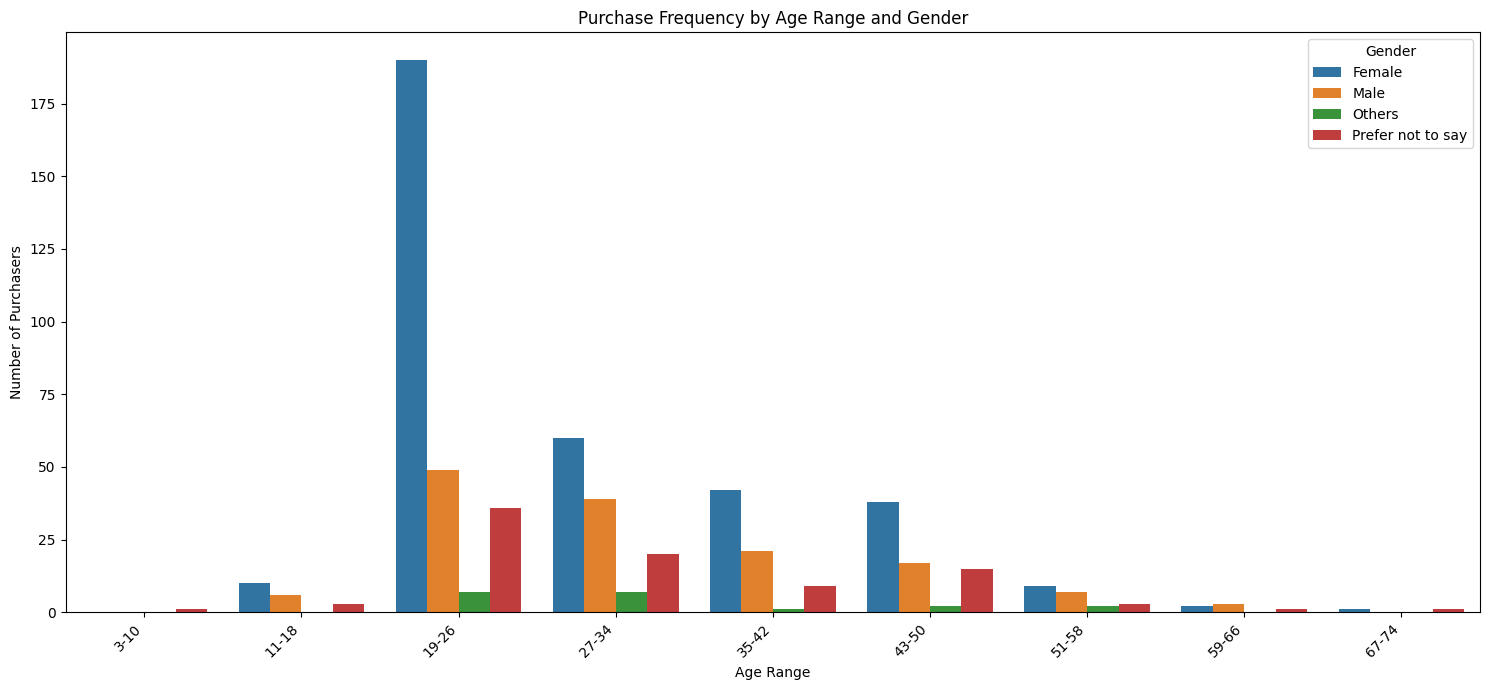

In [991]:
# Check if df exists, is a DataFrame, and has 'age_group' and 'Gender' columns
if 'df' in locals() and isinstance(df, pd.DataFrame) and df is not None and 'age_group' in df.columns and 'Gender' in df.columns:

    # Group by both 'age_group' and 'Gender' and count the purchase frequency
    age_group_gender_purchase_frequency = df.groupby(['age_group', 'Gender'])['Purchase_Frequency'].count().reset_index()

    # Rename the count column for clarity
    age_group_gender_purchase_frequency.rename(columns={'Purchase_Frequency': 'Purchase Count'}, inplace=True)

    # Sort by age group for better visualization (optional but recommended)
    # This requires converting the 'age_group' labels to a categorical type with the correct order
    age_group_order = df['age_group'].cat.categories
    age_group_gender_purchase_frequency['age_group'] = pd.Categorical(
        age_group_gender_purchase_frequency['age_group'],
        categories=age_group_order,
        ordered=True
    )
    age_group_gender_purchase_frequency = age_group_gender_purchase_frequency.sort_values(by='age_group')


    # Create a bar plot segmented by gender
    plt.figure(figsize=(15, 7)) # Adjust figure size as needed
    sns.barplot(x='age_group', y='Purchase Count', hue='Gender', data=age_group_gender_purchase_frequency)
    plt.title('Purchase Frequency by Age Range and Gender')
    plt.xlabel('Age Range')
    plt.ylabel('Number of Purchasers')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.show()

else:
    print("\ndf not found, is not a DataFrame, is None, or does not contain 'age_group' or 'Gender' columns. Cannot create age range and gender purchase frequency graph.")

* **Note:** It's worth highlighting that the 19-26 age bracket is predominantly female. In contrast, the purchase frequency patterns in the 3-18 and 51-74 age groups appear less influenced by gender, potentially due to age-related variations in shopping habits.

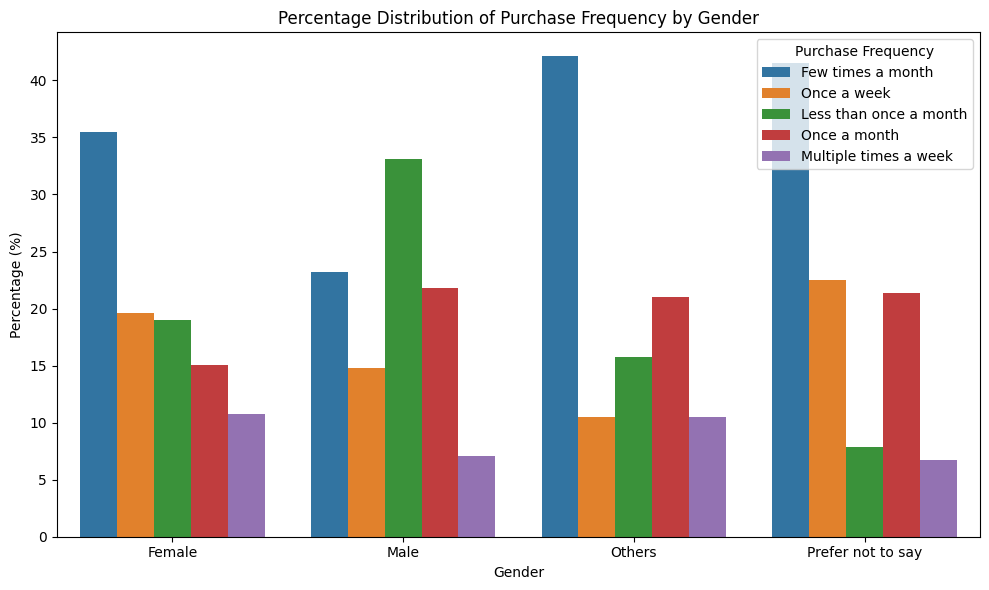

In [992]:
# Calculate the percentage distribution as before
gender_purchase_frequency_percentage = df.groupby('Gender')['Purchase_Frequency'].value_counts(normalize=True).mul(100).round(2)

# Reset the index to turn the grouped output into a DataFrame for easier plotting
gender_purchase_frequency_percentage = gender_purchase_frequency_percentage.rename('Percentage').reset_index()

# Create the stacked bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(x='Gender', y='Percentage', hue='Purchase_Frequency', data=gender_purchase_frequency_percentage)

plt.title('Percentage Distribution of Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Purchase Frequency')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()



*   **Note:** Based on the analysis of purchase frequency by gender, the following observations can be made:

  * Customers who identified their gender as "Others" or "Prefer not to say" tend to make purchases a few times a month.
  * Male customers exhibit a lower purchase frequency, typically shopping less than once a month.



In [993]:
#creating a variable for the df at this point
df_setting1 = df
display(styled_dataframe_header(df_setting1.head()))

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Gender_mapping,age_group,age_group_mapping
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,0,19-26,3
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,0,19-26,3
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2,19-26,3
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;others,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,0,19-26,3
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,0,19-26,3


None

# 5. Hypothesis/Prediction

Given what's in the notebook thus far, what hypothesis or predictions can be made about the project for a dnn model with K-Means clustering?

Hypothesis/Predictions for DNN Model with K-Means Clustering based on Current Data Analysis

Based on the initial data analysis conducted so far, focusing on age and gender demographics and their relation to purchase frequency, we can formulate some initial hypotheses and predictions regarding the potential performance and focus of a Deep Neural Network (DNN) and how K-Means clustering might complement this analysis, if applied to this dataset.

It's important to note that the current analysis is limited to only a few columns (age, gender, Purchase_Frequency) and doesn't involve the actual product categories or other behavioral features which are crucial for a robust predictive model. Therefore, these are preliminary hypotheses that would need to be refined once more data features are explored and potentially engineered.

**Hypotheses**

**1. Age and Gender as Important Predictors for Purchase Frequency (for a potential DNN):** The analysis shows clear variations in purchase frequency across different age groups and genders.

* **Hypothesis:** A DNN model trained to predict purchase frequency or categorize purchasing behavior would likely leverage age and gender as significant features. The model might learn to associate certain age-gender combinations with higher or lower purchase frequencies.
* **Prediction:** We predict that features derived from 'age' (especially the 'age_group_mapping') and 'Gender_mapping' will have relatively high importance in a DNN model trained on this dataset for tasks related to predicting purchase behavior.

**2. Potential for Age/Gender Specific Targeting and Customer Segmentation (for a potential DNN and K-Means):** The segmented analysis by age range and gender suggests that purchasing patterns might differ between these groups.

* **Hypothesis:** A DNN could potentially learn age- and gender-specific patterns in other features (like product categories, browsing behavior, etc.) to make more accurate predictions or recommendations. Furthermore, K-Means clustering is expected to identify distinct customer segments based on these demographic and behavioral features, potentially revealing groups with similar purchase frequency patterns.
* **Prediction:** A DNN could potentially be used to develop targeted marketing strategies or personalized recommendations based on the age and gender of the customer, as these demographics appear to influence overall purchase frequency. Concurrently, K-Means clustering is predicted to reveal specific customer segments characterized by unique combinations of age group, gender, and potentially other behavioral traits, offering insights for segment-specific strategies.

**Predictions (Specifically if applied to predicting Purchase Frequency and Customer Segmentation)**

* **1. Age Groups 19-26 and 27-34 will show higher overall purchase frequency** predictions compared to older age groups in the DNN model, given their higher counts in the purchase frequency by age range plot. K-Means is likely to identify clusters where these age groups are prominent.

* **2. Females might show slightly different purchase frequency patterns within age groups compared to Males**, as indicated by the segmented bar plot. A DNN model might capture these subtle differences for more nuanced predictions. K-Means could reveal distinct clusters where one gender is significantly more represented within specific age ranges or purchase frequency levels.

* **3. The 'age_group_mapping' feature will be more informative than the raw 'age' feature** for a DNN predicting purchase frequency, as the grouping likely smooths out noise and highlights key age segments. K-Means clustering will also benefit from the 'age_group_mapping' as it provides clear categorical boundaries for segmentation.

These predictions are directly derived from the observed trends in the initial data analysis. As more features of the dataset are explored (like Purchase Categories, Browsing Frequency, Review Importance, etc.), more specific and potentially complex hypotheses and predictions can be formulated, especially regarding which combinations of features are most predictive for the DNN and how K-Means can effectively segment customers based on a broader set of characteristics. The interplay between the predictive capabilities of the DNN and the segmentation insights from K-Means can provide a more comprehensive understanding of customer behavior.

# 6. Data Transformation

🔄 Preprocessing Steps



1.   Handle Missing Values: Ensure that missing data is appropriately addressed, either through imputation or removal.
2.   Encode Categorical Variables: Convert categorical variables (e.g., Gender, Product_Search_Method) into numerical formats using encoding techniques.
2.   Normalize Numerical Features: Standardize numerical features to ensure equal weighting during analysis.
2.   Dimensionality Reduction (Optional): Apply PCA to reduce dimensionality while preserving variance, aiding in visualization and clustering.





**6.1 Remove Nulls in the dataset**

Handle Missing Values: Ensure that missing data is appropriately addressed, either through imputation or removal.

In [994]:
# Calculate null counts
null_counts = df.isnull().sum()

# Convert the Series to a DataFrame
null_counts_df = null_counts.reset_index()

# Rename the columns
null_counts_df.columns = ['Features', 'Null Count']

# Display the DataFrame with the updated column name
print("\nNull Counts by Feature:")

display(styled_dataframe_header(null_counts_df))


Null Counts by Feature:


,Features,Null Count
0,Timestamp,0
1,age,0
2,Gender,0
3,Purchase_Frequency,0
4,Purchase_Categories,0
5,Personalized_Recommendation_Frequency,0
6,Browsing_Frequency,0
7,Product_Search_Method,2
8,Search_Result_Exploration,0
9,Customer_Reviews_Importance,0


None

**Drop Unnecessary Features**

🗑️ Features to Consider Dropping
To streamline your analysis, you might consider dropping the following features:

* Timestamp: Unless temporal analysis is required, this may not add value.

* User_ID: Serves as an identifier and doesn't contribute to behavioral insights.

* Review_Text: Unstructured textual data that requires natural language processing, which might be beyond the current scope.

* Product_Name: Specific product names may not be necessary for clustering based on demographic and behavioral features.

* age_group_mapping: There is already the mapping so no need for this feature as age_group_numeric

* Purchase_Frequency: this will be the target value later in the training for PCA, so not needed right now.


In [995]:
# Define target and features
y = df['Purchase_Frequency']  # or another target if more appropriate
X = df.drop('Purchase_Frequency', axis=1)

# Columns to drop entirely
columns_to_drop_entirely = ['age', 'Gender', 'Timestamp', 'User_ID', 'Review_Text', 'Product_Name', 'age_group'] # Removed 'Purchase_Frequency' as it's the target

# Columns that might have multiple values separated by ';'
multi_value_columns = ['Purchase_Categories'] # Add other columns here if they have multi-values

# Handle multi-value columns: Split and create dummy variables
for col in multi_value_columns:
    if col in df.columns:
        # Check if the column contains string data
        if df[col].dtype == 'object':
            # Split the strings by ';' and create dummy variables
            # .str.split(';') creates a Series of lists
            # .explode() expands each list into rows
            # .str.strip() removes leading/trailing whitespace from the split values
            # .str.get_dummies(sep=';') would also work directly if the original column was comma-separated
            # Using explode and then get_dummies on the resulting unique values is more robust
            split_values = df[col].dropna().astype(str).str.split(';').explode().str.strip()
            dummy_cols = pd.get_dummies(split_values, prefix=col).groupby(level=0).sum() # Sum up dummies for each original row
            # Ensure binary values (sometimes sum > 1 if a category appears multiple times - unlikely with categories)
            dummy_cols = dummy_cols.clip(upper=1)
            # Join the new dummy columns to the original dataframe
            df = df.join(dummy_cols)
            # Drop the original multi-value column after creating dummies
            columns_to_drop_entirely.append(col)
        else:
             print(f"Column '{col}' does not seem to contain string data. Skipping splitting.")
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping.")


# Drop the original columns now, including the multi-value ones that were just processed
df.drop(columns=columns_to_drop_entirely, inplace=True, errors='ignore')


# Handle other categorical variables (non-multi-value) if any remain and are not dropped
# Assuming columns_to_drop_entirely covered all originally non-numeric columns except the target.
# If there are other single-value categorical columns not dropped, apply get_dummies here.
# Example: df = pd.get_dummies(df, drop_first=True) # This line might still be needed for other columns


# Now, define X using the modified df (after dropping and handling multi-value columns)
X = df.copy() # X should be the features, which is the modified df

print('New DF (dataframe) after dropping unnecessary features and handling multi-values')
display(styled_dataframe_header(df.head()))

print('\nPurchase_Frequency (Target variable y)')
# Check the type of y and display head if it's pandas Series/DataFrame
if isinstance(y, (pd.Series, pd.DataFrame)):
    print(y.head())
else:
    print(y[:5]) # Print first few elements for other types like numpy array

# The subsequent cells (Scaling, PCA, Train-test split, DNN)
# will now correctly use this modified 'df' (or X) as input.
# Ensure that the scaling and PCA steps in ipython-input-24
# use this new 'X' (which is the modified 'df') as their input.


# #Define target and features
# y = df['Purchase_Frequency']  # or another target if more appropriate
# X = df.drop('Purchase_Frequency', axis=1)
# columns_to_drop = ['age', 'Gender', 'Timestamp', 'User_ID', 'Review_Text', 'Product_Name', 'age_group', 'Purchase_Frequency']
# df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# print('New DF (dataframe) after dropping unnecessary features')
# display(styled_dataframe_header(df.head()))

# print('\nPurchase_Frequency')
# print(y)

New DF (dataframe) after dropping unnecessary features and handling multi-values


,Purchase_Frequency,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Gender_mapping,age_group_mapping,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Clothing and Fashion,Purchase_Categories_Groceries and Gourmet Food,Purchase_Categories_Home and Kitchen,Purchase_Categories_others
0,Few times a month,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,0,3,1,0,0,0,0
1,Once a month,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,0,3,0,1,0,0,0
2,Few times a month,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2,3,0,1,1,0,0
3,Once a month,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,0,3,1,1,0,0,1
4,Less than once a month,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,0,3,1,1,0,0,0


None


Purchase_Frequency (Target variable y)
0         Few times a month
1              Once a month
2         Few times a month
3              Once a month
4    Less than once a month
Name: Purchase_Frequency, dtype: object


**6.2 Encode Categorical Variables**

Convert categorical features into numeric format using Label Encoding and One-Hot Encoding:

In [996]:
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-hot encoding for multi-class categorical variables
df = pd.get_dummies(df, drop_first=True)
#df[Purchase_Categories] = df[Purchase_Categories].apply(lambda x :str.split(';'))
display(styled_dataframe_header(df.head()))

,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,Gender_mapping,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Clothing and Fashion,Purchase_Categories_Groceries and Gourmet Food,Purchase_Categories_Home and Kitchen,Purchase_Categories_others,Purchase_Frequency_Less than once a month,Purchase_Frequency_Multiple times a week,Purchase_Frequency_Once a month,Purchase_Frequency_Once a week,Personalized_Recommendation_Frequency_Sometimes,Personalized_Recommendation_Frequency_Yes,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_Yes,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,age_group_mapping_2,age_group_mapping_3,age_group_mapping_4,age_group_mapping_5,age_group_mapping_6,age_group_mapping_7,age_group_mapping_8,age_group_mapping_9
0,1,2,1,1,0,1,0,0,0,0,False,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,2,3,2,0,0,1,0,0,0,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,4,3,3,2,0,1,1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,F

None

**6.3 Normalize Data**

In [997]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
print("\nFeatures 'X' scaled.")
print("X_scaled shape:", X_scaled.shape)



Features 'X' scaled.
X_scaled shape: (602, 78)


**6.4 Apply PCA**

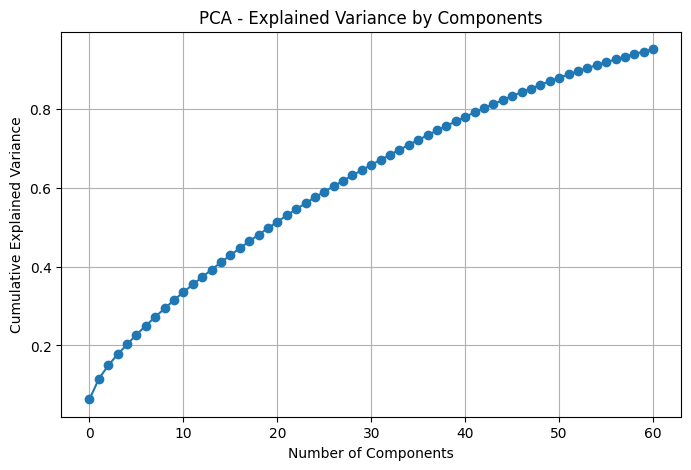


Target variable 'y' is categorical. Applying Label Encoding.
Target variable 'y' label encoded.

Data split into training and testing sets using PCA-transformed features.
X_train_pca shape: (481, 61)
X_test_pca shape: (121, 61)
y_train shape: (481,)
y_test shape: (121,)


In [998]:
#Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
# Fit PCA
#pca = PCA().fit(X_scaled)

X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Components')
plt.grid(True)
plt.show()

# Define the target variable 'y' just before the split.
# IMPORTANT: This assumes 'Purchase_Frequency' is your target
# and it is available in the 'df' dataframe at this point,
# and that it was somehow excluded from X_scaled/X_pca or its inclusion was intended.
# The best practice is to define y *before* scaling and PCA.

# Assuming 'Purchase_Frequency' is the column you want as your target
# target_column_name = y # This line was incorrect, y is the data, not the column name string
# target_column_name_str = 'Purchase_Frequency' # This string is correctly defined

# The variable 'y' was already defined before 'Purchase_Frequency' was dropped from 'df'.
# We should use the 'y' that was already created.

# Re-check and ensure 'y' is correctly encoded if it's categorical
# This was done in a previous cell, but we ensure it's done before the split.
# Assuming 'Purchase_Frequency' was extracted into 'y' BEFORE columns were dropped from df for X.
if y.dtype == 'object' or pd.api.types.is_categorical_dtype(y):
    print("\nTarget variable 'y' is categorical. Applying Label Encoding.")
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    print("Target variable 'y' label encoded.")
elif isinstance(y, pd.Series) and y.dtype in [np.int64, np.float64]:
    print("\nTarget variable 'y' is already numeric.")
else:
     print(f"\nUnexpected target variable type: {type(y)} with dtype {getattr(y, 'dtype', 'N/A')}")
     print("Ensure 'y' is a pandas Series extracted from 'Purchase_Frequency'.")


# Use the data that was already scaled and PCA-transformed for the DNN
# X_pca was created in ipython-input-208 from the scaled numerical features.
# y should be the numerical target variable defined earlier.

# Train-test split using X_pca and the (potentially encoded) y
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets using PCA-transformed features.")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



# 7. Train DNN on PCA-Transformed Data


**7.1 Selected Components Calculations**




In [999]:
#select components calculation table
display(styled_dataframe_header(pd.DataFrame(X_train_pca ).head()))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3.324148,2.904119,2.694509,0.093893,-1.759952,0.592028,-0.162098,0.579784,1.706396,1.293226,0.270602,0.627296,0.322215,-1.448226,-0.511756,0.810013,0.240171,-1.021016,0.446632,1.325852,0.850488,-0.589349,0.550022,-0.889330,0.513560,0.132577,0.176113,-0.054511,-0.294324,0.255853,0.123677,-0.527923,0.122987,-0.343329,0.692573,-0.041337,-0.290509,-0.631537,0.952882,0.614699,-0.714579,-0.800950,0.444290,0.584628,-0.630331,0.326702,0.411498,-0.160206,-0.379230,-1.505946,1.165499,-1.036583,-0.852346,-0.416273,0.240615,0.665261,0.804825,0.356378,0.103674,1.113636,-0.091607
1,-0.078481,-1.664935,-2.467276,0.167872,0.667867,2.342236,0.683865,-1.892420,0.993216,-0.272517,0.090236,0.825245,1.014087,0.039944,-0.510476,-1.714639,-0.720723,0.385011,1.767724,-0.539509,-0.206117,-0.856407,-1.650551,0.777412,0.588958,-0.581426,0.642681,-0.063558,-0.303311,0.244998,-0.498588,0.803905,0.426172,0.659452,-0.791341,-0.382339,-0.384808,0.652033,0.501579,-0.017050,-0.998294,-2.744312,0.014556,0.168610,0.013948,-1.191371,1.845629,0.135597,-0.666663,-1.092892,-0.393206,0.289634,1.197094,-0.268661,-0.084019,-0.711873,-0.313009,-0.407612,-0.206572,-0.002232,0.060758
2,-3.165211,2.490330,-1.237333,-1.961976,-1.757373,-1.190333,1.917874,-0.769075,-0.514937,-1.117573,0.351021,1.444695,0.878449,-1.299184,-1.936831,0.842121,0.701960,0.187186,1.445740,2.682298,-0.032330,-0.651521,-0.067910,1.420987,0.563847,2.468690,1.128026,0.537826,0.319628,-0.716768,1.232002,0.089775,-0.447240,0.845909,-0.631956,1.639367,-0.872804,-0.965895,1.617272,-0.273731,-0.503546,0.480399,2.644170,0.866203,-0.368991,0.941869,-1.351550,-1.356215,-1.794236,1.132308,2.009242,0.999143,-1.259959,0.007509,0.192167,0.297952,0.134983,1.238688,0.788369,-0.751837,-0.549204
3,0.896696,3.037023,1.610254,1.016184,-0.666492,1.290946,-0.316444,0.900736,-0.278193,-0.369111,-1.279750,-0.700919,1.369177,-1.374750,-0.810787,0.984368,1.147412,0.359070,0.771322,-0.324234,1.567457,-0.735532,-0.517412,0.033464,0.793506,0.046081,-0.217355,0.376231,-0.387325,-0.695416,0.487380,0.138989,0.625680,-0.028731,-0.492327,0.106949,-0.643166,0.755785,-0.316037,-0.950731,-0.031962,0.722877,-0.489560,0.483667,-0.198674,-0.432240,-1.637312,1.336673,-0.921527,0.593336,-1.311988,0.075516,-1.126985,1.360459,1.010593,0.682817,-1.113579,-1.204448,-0.855073,-0.659332,0.188912
4,-1.661836,0.598911,-1.908178,-0.913836,-0.675317,-1.095359,-1.616335,-1.348340,-1.704971,0.215591,1.331122,0.175265,1.587560,0.049199,-1.253238,0.931397,-0.303297,1.783649,0.704073,0.692078,1.105884,-1.817120,0.082903,1.714651,-0.231471,-0.564065,0.903001,1.353441,0.333530,-0.070566,0.803421,-0.031456,0.336316,-0.505981,-0.729863,0.693592,-0.637974,-0.189970,0.086709,-1.297481,1.014336,-0.944560,0.480136,-0.023716,-0.110848,-0.724474,0.119678,-0.331064,-1.771962,-0.608354,2.126224,1.577847,-0.373697,-0.813809,0.000830,-1.173417,-0.025375,1.825490,1.022436,0.446903,-0.884889


None

**7.2 Feed selected components into a DNN**


In [1000]:
# Determine the number of unique classes in the target variable (using the training set)
num_classes = len(np.unique(y_train))
print(f"\nNumber of target classes: {num_classes}")

# Input layer neurons should match the number of features *after* PCA
# X_train_pca.shape[1] gives the number of components after PCA
input_dim = X_train_pca.shape[1]
print(f"Input dimension for DNN (number of PCA components): {input_dim}")


# Build and compile the DNN model
# Adjusted the input layer based on the number of PCA components
model = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16),  # Hidden layers #128, 64, 64
                      activation='relu',
                      solver='adam',  # Adam optimizer
                      learning_rate_init=0.01, # Initial learning rate
                      learning_rate='adaptive', # Or 'constant', 'invscaling'
                      random_state=42,
                      max_iter=200, # Adjust max_iter if needed for convergence
                      alpha=0.01) # Add L2 penalty

# Train the Model using PCA-transformed data
print("\nTraining the DNN model on PCA-transformed data...")
model.fit(X_train_pca, y_train)
print("\nTraining finished.")

#                       solver='adam',
#                       random_state=42,
#                       max_iter=200,
print("\nEvaluation:")
# Evaluate the Model
y_pred = model.predict(X_test_pca)

# Calculate the accuracy.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print the classification report.
print("\nClassification Report (with Class Names):")

if 'le_target' in locals():
    # Get the original class names from the LabelEncoder
    target_names = le_target.classes_

    # Ensure unique labels are provided to classification_report
    from sklearn.utils.multiclass import unique_labels
    labels = unique_labels(y_test, y_pred)

    # Print the classification report with target names
    print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))

else:
    print("\nLabelEncoder for the target variable ('le_target') not found. Cannot display class names in the report.")
    # Fallback to printing with numerical labels if encoder not found
    print(classification_report(y_test, y_pred, zero_division=0))


Number of target classes: 5
Input dimension for DNN (number of PCA components): 61

Training the DNN model on PCA-transformed data...

Training finished.

Evaluation:

Accuracy: 0.9421

Classification Report (with Class Names):
                        precision    recall  f1-score   support

     Few times a month       0.94      0.86      0.90        37
Less than once a month       0.85      1.00      0.92        23
 Multiple times a week       0.92      1.00      0.96        11
          Once a month       1.00      0.90      0.95        21
           Once a week       1.00      1.00      1.00        29

              accuracy                           0.94       121
             macro avg       0.94      0.95      0.95       121
          weighted avg       0.95      0.94      0.94       121



**7.3 DNN Model with PCA Conclusion**

**Overall Conclusion:**

The DNN model with PCA has demonstrated a capability to predict Purchase_Frequency based on the processed dataset, achieving an accuracy of 94%. When tested without PCA, accuracy (not shown), was 90%, so using PCA had a 4% improvement. This validates the relevance of the features used. While the DNN itself does not perform customer segmentation, its predictive insights, combined with the clustering results from K-Means (to be explored), will contribute to a deeper understanding of how demographic factors like age and gender influence customer purchase behavior and help identify distinct customer segments. The accuracy of the DNN suggests that the chosen features and the PCA reduction were effective in capturing information relevant to Purchase_Frequency.


# 8. K-Means
```

```

**Raw Data -> Clean/Encode -> Standardize -> K-Means -> Cluster Profiles**


🔄 Preprocessing Steps


1.   Drop unneeded features
2.   Encode cateregorical features
3.   Standardize all features
4.   Run K-Means
5.   Interpreting the Clusters(Results)



#Clustering Objective:

K-Means is a technique for grouping data points into clusters based on their similarity. Goal is to identify distinct groups or segments of Amazon customers based on their behavior and demographics in this dataset, K-Means is a relevant algorithm.

#Numerical Data:

K-Means works best with numerical data. The already performed one-hot encoding for categorical variables, which is a necessary preprocessing step for applying K-Means to this dataset was completed.

In [1001]:
# Resetting df to the original value before DNN with PCA model
# This resets df to the state it was in AFTER initial analysis,
# including 'Gender_mapping' and 'age_group_mapping' but BEFORE
# dropping and handling multi-value columns for the DNN part.
df = df_setting1.copy() # Use .copy() to avoid SettingWithCopyWarning later
print("\nResetting df to the original value before DNN with PCA model")
display(styled_dataframe_header(df.head()))



Resetting df to the original value before DNN with PCA model


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Gender_mapping,age_group,age_group_mapping
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,0,19-26,3
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,0,19-26,3
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2,19-26,3
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;others,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,0,19-26,3
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,0,19-26,3


None

**8.1 Drop Unnecessary Features**




In [1002]:
# Define target and features (for clarity, though not strictly needed for unsupervised K-Means)
# y = df['Purchase_Frequency']  # Target variable (not used in K-Means fitting)

# Columns to drop entirely for K-Means
# We still want to drop columns that are identifiers, unstructured text, or redundant for clustering.
# We also drop the original 'Purchase_Frequency' as it's not a feature for clustering,
# but might be used later to analyze cluster characteristics.
# Keep 'Gender_mapping' and 'age_group_mapping' as numerical features for clustering.
columns_to_drop_entirely = [
    'age',             # Original age (use age_group_mapping)
    'Gender',          # Original Gender (use Gender_mapping)
    'Timestamp',
    'User_ID',
    'Review_Text',
    'Product_Name',
    'age_group',       # Original age group labels (use age_group_mapping)
    'Purchase_Frequency' # Target, not a clustering feature
]

# Columns that might have multiple values separated by ';'
multi_value_columns = ['Purchase_Categories'] # Add other columns here if they have multi-values

# Handle multi-value columns: Split and create dummy variables
for col in multi_value_columns:
    if col in df.columns:
        # Check if the column contains string data
        if df[col].dtype == 'object':
            print(f"Processing multi-value column: {col}")
            split_values = df[col].dropna().astype(str).str.split(';').explode().str.strip()
            if not split_values.empty: # Check if there are values after splitting
                dummy_cols = pd.get_dummies(split_values, prefix=col).groupby(level=0).sum()
                dummy_cols = dummy_cols.clip(upper=1) # Ensure binary values
                # Ensure index alignment when joining
                df = df.join(dummy_cols)
            else:
                 print(f"No valid values found in multi-value column '{col}' after splitting.")
            columns_to_drop_entirely.append(col) # Add original column to drop list
        else:
             print(f"Column '{col}' does not seem to contain string data (is {df[col].dtype}). Skipping splitting.")
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping.")


# Drop the original columns now, including the multi-value ones that were just processed
# Use errors='ignore' to prevent errors if a column was already dropped or never existed
df.drop(columns=columns_to_drop_entirely, inplace=True, errors='ignore')



# Now, define X using the modified df (after dropping and handling multi-value columns)
X = df.copy() # X should be the features, which is the modified df

print('New DF (dataframe) after dropping unnecessary features and handling multi-values')
display(styled_dataframe_header(df.head()))

Processing multi-value column: Purchase_Categories
New DF (dataframe) after dropping unnecessary features and handling multi-values


,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Gender_mapping,age_group_mapping,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Clothing and Fashion,Purchase_Categories_Groceries and Gourmet Food,Purchase_Categories_Home and Kitchen,Purchase_Categories_others
0,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,0,3,1,0,0,0,0
1,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,0,3,0,1,0,0,0
2,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2,3,0,1,1,0,0
3,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,0,3,1,1,0,0,1
4,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,0,3,1,1,0,0,0


None

**8.2 Encode the dataframe**

In [1003]:
# This step is crucial to convert any remaining categorical columns (like Yes/No responses)
# into numerical format before K-Means.
print("\nApplying One-Hot Encoding to remaining categorical columns...")
# Select columns with object or category dtype that were not handled above
categorical_cols_to_encode = df.select_dtypes(include=['object', 'category']).columns
if not categorical_cols_to_encode.empty:
    print(f"Categorical columns to encode: {list(categorical_cols_to_encode)}")
    df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
    print("Encoding complete.")
else:
    print("No additional categorical columns found to encode.")


# Ensure all columns are numeric before scaling and K-Means
# This is a safety check. If this assert fails, inspect df.info()
# to find non-numeric columns that weren't handled.
for col in df.columns:
    try:
        # Attempt to convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # If there are NaNs introduced, they need handling (e.g., fillna)
        # For simplicity here, let's assume successful conversion or prior handling of NaNs
        if df[col].isnull().any():
             print(f"Warning: NaNs introduced or present in column '{col}' after attempting numeric conversion.")
             # Consider adding imputation here, e.g., df[col].fillna(df[col].median(), inplace=True)
    except ValueError as e:
        print(f"Error converting column '{col}' to numeric: {e}")
        # This should not happen if get_dummies worked, but useful for debugging.
        # Identify and inspect the problematic values in df[col].unique()


# Drop any columns that might have become all NaN after coercion if imputation wasn't added
df.dropna(axis=1, how='all', inplace=True)


print('New DF (dataframe) after dropping, handling multi-values, and encoding:')
display(styled_dataframe_header(df.head()))
print(f"\nShape of DataFrame for K-Means: {df.shape}")
print("\nData types of columns in the DataFrame for K-Means:")
print(df.info()) # Check dtypes - should all be numeric


# Now define X using the fully processed and numeric df
X = df.copy()



Applying One-Hot Encoding to remaining categorical columns...
Categorical columns to encode: ['Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas', 'age_group_mapping']
Encoding complete.
New DF (dataframe) after dropping, handling multi-values, and encoding:


,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,Gender_mapping,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Clothing and Fashion,Purchase_Categories_Groceries and Gourmet Food,Purchase_Categories_Home and Kitchen,Purchase_Categories_others,Personalized_Recommendation_Frequency_Sometimes,Personalized_Recommendation_Frequency_Yes,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_Yes,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,age_group_mapping_2,age_group_mapping_3,age_group_mapping_4,age_group_mapping_5,age_group_mapping_6,age_group_mapping_7,age_group_mapping_8,age_group_mapping_9
0,1,2,1,1,0,1,0,0,0,0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,2,3,2,0,0,1,0,0,0,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,4,3,3,2,0,1,1,0,0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,5,3,3,4,0,1,1,0,0,1,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,Tru

None


Shape of DataFrame for K-Means: (602, 74)

Data types of columns in the DataFrame for K-Means:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 74 columns):
 #   Column                                                                                            Non-Null Count  Dtype
---  ------                                                                                            --------------  -----
 0   Customer_Reviews_Importance                                                                       602 non-null    int64
 1   Personalized_Recommendation_Frequency                                                             602 non-null    int64
 2   Rating_Accuracy                                                                                   602 non-null    int64
 3   Shopping_Satisfaction                                                                             602 non-null    int64
 4   Gender_mapping                              

**8.3 Standardize Data**

In [1004]:
print("\nScaling the features for K-Means...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaling finished.")
print("X_scaled shape:", X_scaled.shape)


Scaling the features for K-Means...
Scaling finished.
X_scaled shape: (602, 74)


**8.4 Run K-Means**


Running Elbow Method to find optimal number of clusters...


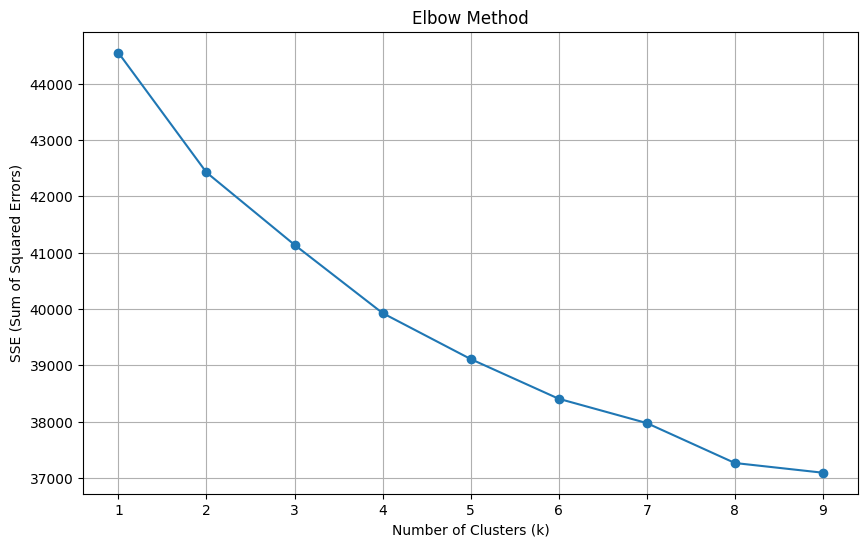


Visually inspect the plot above to choose the optimal k (elbow point).

Applying K-Means with chosen optimal_k = 8

Cluster labels added to the original DataFrame copy (df_setting1).


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Gender_mapping,age_group,age_group_mapping,cluster
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,0,19-26,3,4
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,0,19-26,3,4
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2,19-26,3,7
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;others,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,0,19-26,3,3
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,0,19-26,3,4


None


Cluster Analysis:

Cluster Sizes:
cluster
0    107
1     19
2    130
3    145
4     92
5      1
6      1
7    107
dtype: int64


In [1005]:
# Assuming X_scaled is your preprocessed and scaled data
# Determine the optimal number of clusters using the elbow method
print("\nRunning Elbow Method to find optimal number of clusters...")
sse = []
# Check if X_scaled has enough samples and features for clustering
if X_scaled.shape[0] < 2 or X_scaled.shape[1] < 1:
    print("Error: X_scaled has insufficient data for clustering.")
elif X_scaled.shape[0] < 10: # Reduce max k if dataset is very small
     max_k = X_scaled.shape[0] -1 if X_scaled.shape[0] > 1 else 1
     print(f"Warning: Dataset size is small ({X_scaled.shape[0]}). Reducing max k for elbow method to {max_k}.")
     k_range = range(1, max_k + 1)
else:
    k_range = range(1, 10) # Try different values of k

if len(k_range) > 0:
    for k in k_range:
        # Ensure k is less than or equal to the number of samples
        if k > X_scaled.shape[0]:
            print(f"Warning: Skipping k={k} as it's larger than the number of samples.")
            continue
        # Ensure n_init is appropriate (preferably >= 10)
        n_init_val = max(10, k) # Use at least 10 initializations, more if k is large
        # Also check if n_init > number of initializations possible (number of samples)
        n_init_val = min(n_init_val, X_scaled.shape[0])

        try:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init_val, init='k-means++') # Use k-means++ init
            kmeans.fit(X_scaled) # Fit using the SCALED data
            sse.append(kmeans.inertia_)
        except Exception as e:
            print(f"Error fitting KMeans for k={k}: {e}")
            sse.append(np.nan) # Append NaN if fitting fails


    plt.figure(figsize=(10, 6))
    plt.plot(k_range[:len(sse)], sse, marker='o') # Plot only for k values where fit was attempted
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('SSE (Sum of Squared Errors)')
    plt.xticks(k_range) # Ensure x-axis ticks match k_range
    plt.grid(True)
    plt.show()

    # Based on the elbow plot, choose an optimal k
    # You need to visually inspect the plot and decide
    print("\nVisually inspect the plot above to choose the optimal k (elbow point).")
    # For demonstration, let's choose k=3 as the user's original code suggested,
    # but you should replace this based on the generated plot.
    optimal_k = 8  # <<< --- REPLACE THIS WITH YOUR CHOSEN K FROM THE ELBOW PLOT

    print(f"\nApplying K-Means with chosen optimal_k = {optimal_k}")

    # Apply K-Means with the chosen number of clusters
    # Ensure optimal_k is valid
    if optimal_k >= 1 and optimal_k <= X_scaled.shape[0]:
        n_init_final = max(10, optimal_k)
        n_init_final = min(n_init_final, X_scaled.shape[0])
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=n_init_final, init='k-means++')
        cluster_labels = kmeans.fit_predict(X_scaled) # Fit and predict using the SCALED data

        # Add the cluster labels back to your ORIGINAL DataFrame (df_setting1)
        # This allows you to analyze the clusters using the original, readable features.
        # Make sure the indices align. df_setting1 should have the same index as X_scaled.
        if df_setting1.index.equals(df.index): # Check if original df index aligns with processed df index
             df_setting1['cluster'] = cluster_labels
             print(f"\nCluster labels added to the original DataFrame copy (df_setting1).")
             display(styled_dataframe_header(df_setting1.head()))

             # Analyze the characteristics of each cluster using the original df copy
             print("\nCluster Analysis:")
             cluster_analysis = df_setting1.groupby('cluster').size()
             print("\nCluster Sizes:")
             print(cluster_analysis)

             # You can now perform further analysis, e.g.,
             # print("\nMean values for each cluster (using selected original columns):")
             # display(styled_dataframe_header(df_setting1.groupby('cluster')[['age_group_mapping', 'Gender_mapping', 'Purchase_Frequency']].mean()))

        else:
            print("\nError: Index mismatch between original DataFrame copy and processed DataFrame. Cannot add cluster labels.")
            # This indicates an issue in the preprocessing steps that altered the index.
            # Review dropping/joining steps to ensure index is preserved.

    else:
        print(f"\nError: Chosen optimal_k ({optimal_k}) is invalid for clustering with {X_scaled.shape[0]} samples.")

else:
     print("\nCould not run Elbow Method due to insufficient data.")

**8.5 Intrept Cluster/Results**

In [1006]:
# 7.5 Interpreting the Clusters

# It's best to interpret the clusters using the original or easily interpretable features.
# Since we added the 'cluster' column back to `df_setting1`, we can use that.
# Let's look at the mean values of some key original/mapped numerical features
# and the distribution of original categorical features within each cluster.

# Key numerical/mapped features we want to analyze the cluster means for:
# numerical_features_to_analyze = [ # This list wasn't actually used for calculating means
#     'age_group_mapping',
#     'Gender_mapping',
    # Add other relevant numerical features that were used in clustering
    # For example, if you one-hot encoded Yes/No columns, you might want to
    # look at the mean (proportion of 'Yes') for those columns.
    # Identify some key one-hot encoded columns based on the processed df:
    # You can get the list of columns in the final 'X' used for clustering
    # X_scaled corresponds to the columns in df *before* scaling.
# ]

# Let's get the list of columns in the DataFrame *after* all processing
# but *before* scaling, as these are the features used in clustering.
# The `df` at the end of step 7.2 is this DataFrame.
# We need to add the cluster labels to THIS DataFrame to analyze the features
# used for clustering in relation to the clusters.

# Add the cluster labels back to the processed DataFrame `df`
# This `df` is the one that was used to create X_scaled,
# so its columns match the features used in clustering.
# Use reindex to ensure alignment, filling with NaN if labels mismatch
if len(cluster_labels) == len(df):
    df['cluster'] = cluster_labels
    print("\nCluster labels added to the processed DataFrame `df`.")
    display(styled_dataframe_header(df.head()))

    # Redefine numerical_binary_features_for_means using the columns of the processed `df`
    # now that it includes the 'cluster' column.
    features_used_in_clustering = df.columns.tolist()
    # Filter the list to include potentially interesting numerical/binary columns for interpretation
    # Exclude the 'cluster' column itself
    numerical_binary_features_for_means = [col for col in features_used_in_clustering if df[col].dtype != 'object' and col != 'cluster']

    print("\n--- Cluster Interpretation ---")

    # Analyze mean values for numerical/mapped features
    print("\nMean feature values per cluster (using processed numerical features):")
    # Now group the processed `df` by the new 'cluster' column
    cluster_means = df.groupby('cluster')[numerical_binary_features_for_means].mean()
    display(styled_dataframe_header(cluster_means))
    print("\nInterpretation of means:")
    # Interpretations below this line were generally correct, but now they will be
    # based on the means of the actual features used in K-Means (including one-hot encoded).
    print("- age_group_mapping: Higher mean indicates older age groups are more prevalent.")
    print("- Gender_mapping: Depends on your original mapping (e.g., 0=Female, 1=Male). Mean closer to 1 suggests more Males.")
    print("- One-Hot Encoded Columns (e.g., Purchase_Categories_X, Review_Left_Yes): Mean represents the proportion of customers in the cluster who have this characteristic.")


    # Analyze distribution of original categorical features (if any were kept or can be derived)
    # This is trickier if original categorical columns were dropped or complex (like Purchase_Categories).
    # We can look at the distribution of the *original* 'Purchase_Frequency' within each cluster
    # (assuming 'Purchase_Frequency' is available in df_setting1 - it should be, as we reset df to df_setting1 earlier)
    # IMPORTANT: We use df_setting1 here because it contains the original 'Purchase_Frequency', 'Gender', and 'age_group' labels.
    # We need to ensure df_setting1 also has the 'cluster' column added correctly.
    # The optimal place to add cluster labels is to the DataFrame you will use for analysis.
    # Since you want to analyze against original features, add `cluster_labels` to `df_setting1` as originally intended.

    # Re-adding cluster labels to df_setting1 (this was already attempted in the previous cell but let's be explicit here)
    # Make sure the index aligns. df_setting1 should have the same index as X_scaled/df *before* processing.
    # If df_setting1's index was preserved throughout, this should work.
    if df_setting1.index.equals(df.index): # Check alignment with the processed df, which got the labels first
         df_setting1['cluster'] = cluster_labels
         print(f"\nCluster labels successfully added to the original DataFrame copy (df_setting1).")
         # Display head of df_setting1 again to confirm
         # display(styled_dataframe_header(df_setting1.head()))
    else:
        print("\nWarning: Index mismatch when attempting to add cluster labels to df_setting1. Skipping analysis on original columns.")
        # You might need to reset index on processed df or align indices if this warning appears.


    # Now perform analysis using df_setting1 (which has original columns + cluster)
    if 'cluster' in df_setting1.columns: # Proceed only if cluster labels were added to df_setting1

        if 'Purchase_Frequency' in df_setting1.columns:
            print("\nDistribution of Original Purchase Frequency within each cluster:")
            purchase_frequency_distribution = df_setting1.groupby('cluster')['Purchase_Frequency'].value_counts(normalize=True).mul(100).round(2)
            # Rename for clarity and reset index for better display
            purchase_frequency_distribution = purchase_frequency_distribution.rename('Percentage').reset_index()

            # Pivot for a more readable table format
            # Need to ensure all possible Purchase_Frequency values are columns, even if some clusters don't have them
            all_freq_levels = df_setting1['Purchase_Frequency'].unique()
            purchase_frequency_pivot = purchase_frequency_distribution.pivot(index='cluster', columns='Purchase_Frequency', values='Percentage').fillna(0)
            # Reindex columns to ensure consistent order and include all levels
            purchase_frequency_pivot = purchase_frequency_pivot.reindex(columns=all_freq_levels, fill_value=0)
            display(styled_dataframe_header(purchase_frequency_pivot))

            print("\nInterpretation of Purchase Frequency Distribution:")


        # Analyze distribution of the original Gender
        if 'Gender' in df_setting1.columns:
             print("\nDistribution of Original Gender within each cluster:")
             gender_distribution = df_setting1.groupby('cluster')['Gender'].value_counts(normalize=True).mul(100).round(2)
             gender_distribution = gender_distribution.rename('Percentage').reset_index()
             gender_pivot = gender_distribution.pivot(index='cluster', columns='Gender', values='Percentage').fillna(0)
             # Reindex columns for consistent order
             all_genders = df_setting1['Gender'].unique()
             gender_pivot = gender_pivot.reindex(columns=all_genders, fill_value=0)
             display(styled_dataframe_header(gender_pivot))
             print("\nInterpretation of Gender Distribution:")


        # Analyze distribution of the original Age Group labels
        if 'age_group' in df_setting1.columns:
             print("\nDistribution of Original Age Group within each cluster:")
             age_group_distribution = df_setting1.groupby('cluster')['age_group'].value_counts(normalize=True).mul(100).round(2)
             age_group_distribution = age_group_distribution.rename('Percentage').reset_index()
             age_group_pivot = age_group_distribution.pivot(index='cluster', columns='age_group', values='Percentage').fillna(0)
             # Reindex columns to ensure correct order (using categories if it's categorical)
             if pd.api.types.is_categorical_dtype(df_setting1['age_group']):
                 all_age_groups = df_setting1['age_group'].cat.categories
             else:
                 all_age_groups = sorted(df_setting1['age_group'].unique()) # Fallback if not categorical
             age_group_pivot = age_group_pivot.reindex(columns=all_age_groups, fill_value=0)
             display(styled_dataframe_header(age_group_pivot))
             print("\nInterpretation of Age Group Distribution:")

        # Analysis of one-hot encoded columns (using the means calculated from the processed `df`)
        if 'cluster' in df.columns: # Check if cluster labels were added to the processed df
             purchase_category_mean_cols = [col for col in cluster_means.columns if col.startswith('Purchase_Categories_')]
             if purchase_category_mean_cols:
                 print("\nMean Purchase Category presence per cluster (proportion of customers who bought in category):")
                 # Use cluster_means derived from the processed `df`
                 display(styled_dataframe_header(cluster_means[purchase_category_mean_cols]))
                 print("\nInterpretation of Purchase Category Means:")
                 print("- Higher mean for a category means a larger proportion of customers in that cluster purchased items in that category.")
                 print("- Identify which categories are popular in which clusters.")

             # Add analysis for other one-hot encoded features if desired
             other_binary_mean_cols = [col for col in cluster_means.columns if col not in purchase_category_mean_cols and col not in ['age_group_mapping', 'Gender_mapping']]
             if other_binary_mean_cols:
                 print("\nMean values for other binary/processed features per cluster:")
                 display(styled_dataframe_header(cluster_means[other_binary_mean_cols]))
                 print("\nInterpretation:") # Add specific interpretations based on column names


        # Summarize the clusters based on the analysis above
        print("\n--- Summary of Clusters ---")
        # Use cluster_analysis derived from df_setting1 for size
        for cluster_id in sorted(df_setting1['cluster'].unique()):
            print(f"\nCluster {cluster_id}:")
            cluster_size = cluster_analysis.get(cluster_id, 0)
            print(f"  Size: {cluster_size} customers ({cluster_size/len(df_setting1)*100:.2f}%)")

            # Provide summary points based on the tables generated above

            # Example summary points (adapt based on your actual results):
            # Use cluster_means (from processed df) for means of numerical/encoded features
            if 'cluster' in df.columns and cluster_id in cluster_means.index:
                 print("  Characteristics (Mean Values of Processed Features):")
                 cluster_row_means = cluster_means.loc[cluster_id]

                 # Safely print numerical means, handling potential non-numeric values
                 age_mean = cluster_row_means.get('age_group_mapping', 'N/A')
                 if isinstance(age_mean, (int, float)):
                     print(f"    Average Age Group Mapping: {age_mean:.2f}")
                 else:
                     print(f"    Average Age Group Mapping: {age_mean}") # Print as string if not numeric

                 gender_mean = cluster_row_means.get('Gender_mapping', 'N/A')
                 if isinstance(gender_mean, (int, float)):
                     print(f"    Average Gender Mapping: {gender_mean:.2f}") # Interpret based on your mapping
                 else:
                     print(f"    Average Gender Mapping: {gender_mean}") # Print as string if not numeric


                 # Add more key features here, e.g., from other_binary_mean_cols
                 for col_name in other_binary_mean_cols:
                      proportion = cluster_row_means.get(col_name, 0.0)
                      # You might want to print only if proportion is significant
                      if isinstance(proportion, (int, float)) and proportion > 0.5: # Example threshold
                          print(f"    {col_name}: {proportion:.2f}")
                      elif not isinstance(proportion, (int, float)):
                          print(f"    {col_name}: {proportion}")


            # Use the pivot tables (derived from df_setting1) for distributions of original features
            if not purchase_frequency_pivot.empty and cluster_id in purchase_frequency_pivot.index:
                 print("  Original Purchase Frequency Distribution (%):")
                 freq_dist = purchase_frequency_pivot.loc[cluster_id]
                 # Print percentages for relevant frequency levels, excluding those with 0%
                 for freq_level in purchase_frequency_pivot.columns: # Use column names from pivot table
                     percentage = freq_dist.get(freq_level, 0.0)
                     if percentage > 0:
                         print(f"    {freq_level}: {percentage:.2f}%")


            if not gender_pivot.empty and cluster_id in gender_pivot.index:
                 print("  Original Gender Distribution (%):")
                 gender_dist = gender_pivot.loc[cluster_id]
                 for gender_label in gender_pivot.columns: # Use column names from pivot table
                      percentage = gender_dist.get(gender_label, 0.0)
                      if percentage > 0:
                           print(f"    {gender_label}: {percentage:.2f}%")


            if not age_group_pivot.empty and cluster_id in age_group_pivot.index:
                 print("  Original Age Group Distribution (%):")
                 age_dist = age_group_pivot.loc[cluster_id]
                 # Sort age groups for printing (based on pivot column order)
                 for age_grp in age_group_pivot.columns:
                      percentage = age_dist.get(age_grp, 0.0)
                      if percentage > 0:
                           print(f"    {age_grp}: {percentage:.2f}%")

            # Summarize key purchase categories (using the means from processed df)
            if purchase_category_mean_cols and 'cluster' in df.columns and cluster_id in cluster_means.index:
                print("  Key Purchase Categories (Proportion of customers who bought in category):")
                cluster_row_means = cluster_means.loc[cluster_id]
                # Print proportions for categories, maybe only those above a certain threshold
                sorted_cat_means = sorted([(col, cluster_row_means.get(col, 0.0)) for col in purchase_category_mean_cols], key=lambda x: x[1], reverse=True)
                printed_cats = 0
                for cat_col, proportion in sorted_cat_means:
                     # Safely check if proportion is numeric before comparison and formatting
                     if isinstance(proportion, (int, float)) and proportion > 0.2 and printed_cats < 5: # Print up to 5 categories with >20% proportion (adjust threshold/count)
                          category_name = cat_col.replace('Purchase_Categories_', '')
                          print(f"    - {category_name}: {proportion:.2f}")
                          printed_cats += 1
                     elif not isinstance(proportion, (int, float)):
                          print(f"    - {cat_col}: {proportion}") # Print as is if not numeric

                if printed_cats == 0 and all(not isinstance(cluster_row_means.get(col, 0.0), (int, float)) for col in purchase_category_mean_cols):
                     print("    - No numerical purchase categories identified for summary.")
                elif printed_cats == 0:
                    print("    - No significant purchase categories identified above the threshold.")


    else:
        print("\nCannot perform analysis on original columns because cluster labels were not successfully added to df_setting1.")


else:
    print("\nCannot perform cluster analysis because cluster labels were not successfully added to the processed DataFrame `df`.")



Cluster labels added to the processed DataFrame `df`.


,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,Gender_mapping,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Clothing and Fashion,Purchase_Categories_Groceries and Gourmet Food,Purchase_Categories_Home and Kitchen,Purchase_Categories_others,Personalized_Recommendation_Frequency_Sometimes,Personalized_Recommendation_Frequency_Yes,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_Yes,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,age_group_mapping_2,age_group_mapping_3,age_group_mapping_4,age_group_mapping_5,age_group_mapping_6,age_group_mapping_7,age_group_mapping_8,age_group_mapping_9,cluster
0,1,2,1,1,0,1,0,0,0,0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4
1,1,2,3,2,0,0,1,0,0,0,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4
2,2,4,3,3,2,0,1,1,0,0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,7
3,5,3,3,4,0,1,1,0,0,1,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,F

None


--- Cluster Interpretation ---

Mean feature values per cluster (using processed numerical features):


,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,Gender_mapping,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Clothing and Fashion,Purchase_Categories_Groceries and Gourmet Food,Purchase_Categories_Home and Kitchen,Purchase_Categories_others,Personalized_Recommendation_Frequency_Sometimes,Personalized_Recommendation_Frequency_Yes,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_Yes,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,age_group_mapping_2,age_group_mapping_3,age_group_mapping_4,age_group_mapping_5,age_group_mapping_6,age_group_mapping_7,age_group_mapping_8,age_group_mapping_9
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.046729,2.813084,2.719626,2.691589,0.532710,0.485981,0.607477,0.186916,0.392523,0.261682,0.345794,0.158879,0.345794,0.065421,0.177570,0.177570,0.495327,0.102804,0.439252,0.420561,0.130841,0.028037,0.065421,0.317757,0.485981,0.252336,0.093458,0.046729,0.009346,0.177570,0.373832,0.383178,0.401869,0.299065,0.037383,0.317757,0.271028,0.448598,0.102804,0.317757,0.168224,0.000000,0.214953,0.000000,0.000000,0.504673,0.000000,0.149533,0.130841,0.000000,0.299065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233645,0.000000,0.345794,0.000000,0.121495,0.000000,0.000000,0.000000,0.000000,0.028037,0.252336,0.224299,0.205607,0.233645,0.056075,0.000000,0.000000
1,3.578947,4.210526,4.052632,3.789474,1.052632,0.263158,0.315789,0.105263,0.421053,0.736842,0.421053,0.000000,0.105263,0.000000,0.842105,0.052632,0.105263,0.736842,0.315789,0.526316,0.052632,0.684211,0.105263,0.157895,0.052632,0.105263,0.052632,0.631579,0.789474,0.105263,0.105263,0.000000,0.105263,0.000000,0.631579,0.157895,0.157895,0.684211,0.000000,0.315789,0.157895,0.000000,0.157895,0.000000,0.000000,0.157895,0.000000,0.473684,0.157895,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315789,0.000000,0.157895,0.000000,0.368421,0.000000,0.000000,

None


Interpretation of means:
- age_group_mapping: Higher mean indicates older age groups are more prevalent.
- Gender_mapping: Depends on your original mapping (e.g., 0=Female, 1=Male). Mean closer to 1 suggests more Males.
- One-Hot Encoded Columns (e.g., Purchase_Categories_X, Review_Left_Yes): Mean represents the proportion of customers in the cluster who have this characteristic.

Cluster labels successfully added to the original DataFrame copy (df_setting1).

Distribution of Original Purchase Frequency within each cluster:


Purchase_Frequency,Few times a month,Once a month,Less than once a month,Multiple times a week,Once a week
cluster,,,,,
0,44.860000,14.020000,14.020000,7.480000,19.630000
1,21.050000,15.790000,63.160000,0.000000,0.000000
2,35.380000,20.000000,8.460000,10.770000,25.380000
3,38.620000,15.170000,4.830000,12.410000,28.970000
4,25.000000,19.570000,28.260000,13.040000,14.130000
5,0.000000,0.000000,100.000000,0.000000,0.000000
6,0.000000,100.000000,0.000000,0.000000,0.000000
7,24.300000,20.560000,48.600000,3.740000,2.800000


None


Interpretation of Purchase Frequency Distribution:

Distribution of Original Gender within each cluster:


Gender,Female,Prefer not to say,Male,Others
cluster,,,,
0,64.490000,12.150000,20.560000,2.800000
1,36.840000,21.050000,31.580000,10.530000
2,46.150000,20.000000,28.460000,5.380000
3,60.000000,25.520000,11.720000,2.760000
4,66.300000,7.610000,23.910000,2.170000
5,0.000000,0.000000,100.000000,0.000000
6,0.000000,0.000000,100.000000,0.000000
7,63.550000,1.870000,33.640000,0.930000


None


Interpretation of Gender Distribution:

Distribution of Original Age Group within each cluster:


<ipython-input-1006-1020711239>:119: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_setting1['age_group']):


,3-10,11-18,19-26,27-34,35-42,43-50,51-58,59-66,67-74
cluster,,,,,,,,,
0,0.000000,2.800000,25.230000,22.430000,20.560000,23.360000,5.610000,0.000000,0.000000
1,0.000000,5.260000,31.580000,15.790000,21.050000,21.050000,0.000000,5.260000,0.000000
2,0.770000,6.150000,25.380000,36.150000,18.460000,11.540000,0.770000,0.770000,0.000000
3,0.000000,1.380000,58.620000,14.480000,3.450000,13.790000,4.830000,2.070000,1.380000
4,0.000000,1.090000,66.300000,17.390000,7.610000,6.520000,1.090000,0.000000,0.000000
5,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,3.740000,65.420000,13.080000,9.350000,1.870000,5.610000,0.930000,0.000000


None


Interpretation of Age Group Distribution:

Mean Purchase Category presence per cluster (proportion of customers who bought in category):


,Purchase_Categories_Beauty and Personal Care,Purchase_Categories_Clothing and Fashion,Purchase_Categories_Groceries and Gourmet Food,Purchase_Categories_Home and Kitchen,Purchase_Categories_others
cluster,,,,,
0,0.485981,0.607477,0.186916,0.392523,0.261682
1,0.263158,0.315789,0.105263,0.421053,0.736842
2,0.653846,0.715385,0.369231,0.538462,0.292308
3,0.579310,0.468966,0.089655,0.165517,0.034483
4,0.576087,0.663043,0.206522,0.456522,0.282609
5,0.000000,0.000000,0.000000,0.000000,1.000000
6,0.000000,0.000000,0.000000,1.000000,0.000000
7,0.364486,0.467290,0.084112,0.308411,0.504673


None


Interpretation of Purchase Category Means:
- Higher mean for a category means a larger proportion of customers in that cluster purchased items in that category.
- Identify which categories are popular in which clusters.

Mean values for other binary/processed features per cluster:


,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,Personalized_Recommendation_Frequency_Sometimes,Personalized_Recommendation_Frequency_Yes,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Product_Search_Method_Keyword,Product_Search_Method_categories,Product_Search_Method_others,Search_Result_Exploration_Multiple pages,Add_to_Cart_Browsing_No,Add_to_Cart_Browsing_Yes,Cart_Completion_Frequency_Never,Cart_Completion_Frequency_Often,Cart_Completion_Frequency_Rarely,Cart_Completion_Frequency_Sometimes,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Saveforlater_Frequency_Never,Saveforlater_Frequency_Often,Saveforlater_Frequency_Rarely,Saveforlater_Frequency_Sometimes,Review_Left_Yes,Review_Reliability_Moderately,Review_Reliability_Never,Review_Reliability_Occasionally,Review_Reliability_Rarely,Review_Helpfulness_Sometimes,Review_Helpfulness_Yes,Recommendation_Helpfulness_Sometimes,Recommendation_Helpfulness_Yes,Service_Appreciation_All the above,Service_Appreciation_Competitive prices,Service_Appreciation_Customer service,Service_Appreciation_Customer service,Service_Appreciation_Product recommendations,Service_Appreciation_Quick delivery,Service_Appreciation_User-friendly website/app interface,Service_Appreciation_Wide product selection,Improvement_Areas_Add more familiar brands to the list,Improvement_Areas_Customer service responsiveness,Improvement_Areas_I don't have any problem with Amazon,Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,Improvement_Areas_Irrelevant product suggestions,Improvement_Areas_Nil,Improvement_Areas_No problems with Amazon,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,age_group_mapping_2,age_group_mapping_3,age_group_mapping_4,age_group_mapping_5,age_group_mapping_6,age_group_mapping_7,age_group_mapping_8,age_group_mapping_9
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.046729,2.813084,2.719626,2.691589,0.345794,0.158879,0.345794,0.065421,0.177570,0.177570,0.495327,0.102804,0.439252,0.420561,0.130841,0.028037,0.065421,0.317757,0.485981,0.252336,0.093458,0.046729,0.009346,0.177570,0.373832,0.383178,0.401869,0.299065,0.037383,0.317757,0.271028,0.448598,0.102804,0.317757,0.168224,0.000000,0.214953,0.000000,0.000000,0.504673,0.000000,0.149533,0.130841,0.000000,0.299065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233645,0.000000,0.345794,0.000000,0.121495,0.000000,0.000000,0.000000,0.000000,0.028037,0.252336,0.224299,0.205607,0.233645,0.056075,0.000000,0.000000
1,3.578947,4.210526,4.052632,3.789474,0.421053,0.000000,0.105263,0.000000,0.842105,0.052632,0.105263,0.736842,0.315789,0.526316,0.052632,0.684211,0.105263,0.157895,0.052632,0.105263,0.052632,0.631579,0.789474,0.105263,0.105263,0.000000,0.105263,0.000000,0.631579,0.157895,0.157895,0.684211,0.000000,0.315789,0.157895,0.000000,0.157895,0.000000,0.000000,0.157895,0.000000,0.473684,0.157895,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315789,0.000000,0.157895,0.000000,0.368421,0.000000,0.000000,0.000000,0.000000,0.052632,0.315789,0.157895,0.210526,0.210526,0.000000,0.052632,0.000000
2,2.300000,2.161538,2.346154,1.976923,0.353846,0.146154,0.423077,0.215385,0.030769,0.292308,0.361538,0.015385,0.723077,0.438462,0.215385,0.007692,0.538462,0.015385,0.346154,0.515385,0.084615,0.015385,0.007692,0.646154,0.015385,0.292308,

None


Interpretation:

--- Summary of Clusters ---

Cluster 0:
  Size: 107 customers (17.77%)
  Characteristics (Mean Values of Processed Features):
    Average Age Group Mapping: N/A
    Average Gender Mapping: 0.53
    Customer_Reviews_Importance: 3.05
    Personalized_Recommendation_Frequency : 2.81
    Rating_Accuracy : 2.72
    Shopping_Satisfaction: 2.69
    Service_Appreciation_Product recommendations: 0.50
  Original Purchase Frequency Distribution (%):
    Few times a month: 44.86%
    Once a month: 14.02%
    Less than once a month: 14.02%
    Multiple times a week: 7.48%
    Once a week: 19.63%
  Original Gender Distribution (%):
    Female: 64.49%
    Prefer not to say: 12.15%
    Male: 20.56%
    Others: 2.80%
  Original Age Group Distribution (%):
    11-18: 2.80%
    19-26: 25.23%
    27-34: 22.43%
    35-42: 20.56%
    43-50: 23.36%
    51-58: 5.61%
  Key Purchase Categories (Proportion of customers who bought in category):
    - Clothing and Fashion: 0.61
    - Beauty and P

In [1007]:
for col in df.columns:
    # Skip the cluster column itself, as its distribution by cluster is always 100%
    if col == 'cluster':
        print(f"Distribution of '{col}' by Cluster: (Skipping as it's the cluster column itself)")
        # Optionally print the size of each cluster here instead
        # print(df['cluster'].value_counts())
        print("-" * 30)
        continue

    if col in df.columns: # Check if the column exists (redundant inside the loop, but kept from original)
        # Ensure the column is not entirely empty or has non-processable types before value_counts
        if df[col].empty or not pd.api.types.is_hashable(df[col].dtype):
             print(f"Distribution of '{col}' by Cluster: (Skipping due to empty or unhashable data)")
             print("-" * 30)
             continue

        try:
            # Calculate percentage distribution of unique values within the column for each cluster
            # The result is a Series with a MultiIndex (cluster, unique_value)
            value_counts_series = df.groupby('cluster')[col].value_counts(normalize=True).mul(100)

            # Use unstack to pivot the unique values into columns
            # fill_value=0 handles cases where a value doesn't exist in a cluster
            distribution = value_counts_series.unstack(fill_value=0)

            print(f"Distribution of '{col}' by Cluster:")
            # Display using the styled_dataframe_header function if available
            if 'styled_dataframe_header' in globals() and callable(styled_dataframe_header):
                 display(styled_dataframe_header(distribution))
            else:
                 print(distribution) # Fallback to standard print

        except Exception as e:
             print(f"Error processing column '{col}' for distribution: {e}")

        print("-" * 30) # Separator for clarity

Distribution of 'Customer_Reviews_Importance' by Cluster:


Customer_Reviews_Importance,1,2,3,4,5
cluster,,,,,
0,6.542056,19.626168,43.925234,22.429907,7.476636
1,5.263158,5.263158,42.105263,21.052632,26.315789
2,19.230769,40.000000,34.615385,3.846154,2.307692
3,4.827586,14.482759,68.275862,8.965517,3.448276
4,69.565217,8.695652,9.782609,5.434783,6.521739
5,100.000000,0.000000,0.000000,0.000000,0.000000
6,100.000000,0.000000,0.000000,0.000000,0.000000
7,58.878505,11.214953,7.476636,12.149533,10.280374


None

------------------------------
Distribution of 'Personalized_Recommendation_Frequency ' by Cluster:


Personalized_Recommendation_Frequency,1,2,3,4,5
cluster,,,,,
0,7.476636,28.037383,45.794393,13.084112,5.607477
1,0.000000,5.263158,15.789474,31.578947,47.368421
2,20.000000,53.076923,19.230769,6.153846,1.538462
3,2.068966,13.793103,67.586207,15.172414,1.379310
4,35.869565,31.521739,19.565217,8.695652,4.347826
5,100.000000,0.000000,0.000000,0.000000,0.000000
6,100.000000,0.000000,0.000000,0.000000,0.000000
7,7.476636,18.691589,43.925234,18.691589,11.214953


None

------------------------------
Distribution of 'Rating_Accuracy ' by Cluster:


Rating_Accuracy,1,2,3,4,5
cluster,,,,,
0,8.411215,33.644860,38.317757,16.822430,2.803738
1,0.000000,5.263158,21.052632,36.842105,36.842105
2,10.000000,50.000000,36.153846,3.076923,0.769231
3,0.000000,12.413793,77.931034,8.275862,1.379310
4,33.695652,42.391304,18.478261,4.347826,1.086957
5,0.000000,0.000000,0.000000,100.000000,0.000000
6,0.000000,100.000000,0.000000,0.000000,0.000000
7,4.672897,17.757009,61.682243,9.345794,6.542056


None

------------------------------
Distribution of 'Shopping_Satisfaction' by Cluster:


Shopping_Satisfaction,1,2,3,4,5
cluster,,,,,
0,14.953271,25.233645,39.252336,16.822430,3.738318
1,0.000000,10.526316,31.578947,26.315789,31.578947
2,26.153846,54.615385,14.615385,4.615385,0.000000
3,5.517241,15.172414,63.448276,14.482759,1.379310
4,41.304348,35.869565,17.391304,3.260870,2.173913
5,100.000000,0.000000,0.000000,0.000000,0.000000
6,100.000000,0.000000,0.000000,0.000000,0.000000
7,15.887850,36.448598,31.775701,13.084112,2.803738


None

------------------------------
Distribution of 'Gender_mapping' by Cluster:


Gender_mapping,0,1,2,3
cluster,,,,
0,64.485981,20.560748,12.149533,2.803738
1,36.842105,31.578947,21.052632,10.526316
2,46.153846,28.461538,20.000000,5.384615
3,60.000000,11.724138,25.517241,2.758621
4,66.304348,23.913043,7.608696,2.173913
5,0.000000,100.000000,0.000000,0.000000
6,0.000000,100.000000,0.000000,0.000000
7,63.551402,33.644860,1.869159,0.934579


None

------------------------------
Distribution of 'Purchase_Categories_Beauty and Personal Care' by Cluster:


Purchase_Categories_Beauty and Personal Care,0,1
cluster,,
0,51.401869,48.598131
1,73.684211,26.315789
2,34.615385,65.384615
3,42.068966,57.931034
4,42.391304,57.608696
5,100.000000,0.000000
6,100.000000,0.000000
7,63.551402,36.448598


None

------------------------------
Distribution of 'Purchase_Categories_Clothing and Fashion' by Cluster:


Purchase_Categories_Clothing and Fashion,0,1
cluster,,
0,39.252336,60.747664
1,68.421053,31.578947
2,28.461538,71.538462
3,53.103448,46.896552
4,33.695652,66.304348
5,100.000000,0.000000
6,100.000000,0.000000
7,53.271028,46.728972


None

------------------------------
Distribution of 'Purchase_Categories_Groceries and Gourmet Food' by Cluster:


Purchase_Categories_Groceries and Gourmet Food,0,1
cluster,,
0,81.308411,18.691589
1,89.473684,10.526316
2,63.076923,36.923077
3,91.034483,8.965517
4,79.347826,20.652174
5,100.000000,0.000000
6,100.000000,0.000000
7,91.588785,8.411215


None

------------------------------
Distribution of 'Purchase_Categories_Home and Kitchen' by Cluster:


Purchase_Categories_Home and Kitchen,0,1
cluster,,
0,60.747664,39.252336
1,57.894737,42.105263
2,46.153846,53.846154
3,83.448276,16.551724
4,54.347826,45.652174
5,100.000000,0.000000
6,0.000000,100.000000
7,69.158879,30.841121


None

------------------------------
Distribution of 'Purchase_Categories_others' by Cluster:


Purchase_Categories_others,0,1
cluster,,
0,73.831776,26.168224
1,26.315789,73.684211
2,70.769231,29.230769
3,96.551724,3.448276
4,71.739130,28.260870
5,0.000000,100.000000
6,100.000000,0.000000
7,49.532710,50.467290


None

------------------------------
Distribution of 'Personalized_Recommendation_Frequency_Sometimes' by Cluster:


Personalized_Recommendation_Frequency_Sometimes,False,True
cluster,,
0,65.420561,34.579439
1,57.894737,42.105263
2,64.615385,35.384615
3,26.206897,73.793103
4,92.391304,7.608696
5,100.000000,0.000000
6,0.000000,100.000000
7,78.504673,21.495327


None

------------------------------
Distribution of 'Personalized_Recommendation_Frequency_Yes' by Cluster:


Personalized_Recommendation_Frequency_Yes,False,True
cluster,,
0,84.112150,15.887850
1,100.000000,0.000000
2,85.384615,14.615385
3,84.137931,15.862069
4,43.478261,56.521739
5,100.000000,0.000000
6,100.000000,0.000000
7,89.719626,10.280374


None

------------------------------
Distribution of 'Browsing_Frequency_Few times a week' by Cluster:


Browsing_Frequency_Few times a week,False,True
cluster,,
0,65.420561,34.579439
1,89.473684,10.526316
2,57.692308,42.307692
3,43.448276,56.551724
4,64.130435,35.869565
5,100.000000,0.000000
6,0.000000,100.000000
7,63.551402,36.448598


None

------------------------------
Distribution of 'Browsing_Frequency_Multiple times a day' by Cluster:


Browsing_Frequency_Multiple times a day,False,True
cluster,,
0,93.457944,6.542056
1,100.000000,0.000000
2,78.461538,21.538462
3,93.793103,6.206897
4,71.739130,28.260870
5,100.000000,0.000000
6,100.000000,0.000000
7,93.457944,6.542056


None

------------------------------
Distribution of 'Browsing_Frequency_Rarely' by Cluster:


Browsing_Frequency_Rarely,False,True
cluster,,
0,82.242991,17.757009
1,15.789474,84.210526
2,96.923077,3.076923
3,97.931034,2.068966
4,92.391304,7.608696
5,0.000000,100.000000
6,100.000000,0.000000
7,74.766355,25.233645


None

------------------------------
Distribution of 'Product_Search_Method_Keyword' by Cluster:


Product_Search_Method_Keyword,False,True
cluster,,
0,82.242991,17.757009
1,94.736842,5.263158
2,70.769231,29.230769
3,85.517241,14.482759
4,31.521739,68.478261
5,0.000000,100.000000
6,0.000000,100.000000
7,34.579439,65.420561


None

------------------------------
Distribution of 'Product_Search_Method_categories' by Cluster:


Product_Search_Method_categories,False,True
cluster,,
0,50.467290,49.532710
1,89.473684,10.526316
2,63.846154,36.153846
3,45.517241,54.482759
4,83.695652,16.304348
5,100.000000,0.000000
6,100.000000,0.000000
7,74.766355,25.233645


None

------------------------------
Distribution of 'Product_Search_Method_others' by Cluster:


Product_Search_Method_others,False,True
cluster,,
0,89.719626,10.280374
1,26.315789,73.684211
2,98.461538,1.538462
3,97.931034,2.068966
4,96.739130,3.260870
5,100.000000,0.000000
6,100.000000,0.000000
7,97.196262,2.803738


None

------------------------------
Distribution of 'Search_Result_Exploration_Multiple pages' by Cluster:


Search_Result_Exploration_Multiple pages,False,True
cluster,,
0,56.074766,43.925234
1,68.421053,31.578947
2,27.692308,72.307692
3,17.241379,82.758621
4,8.695652,91.304348
5,100.000000,0.000000
6,0.000000,100.000000
7,15.887850,84.112150


None

------------------------------
Distribution of 'Add_to_Cart_Browsing_No' by Cluster:


Add_to_Cart_Browsing_No,False,True
cluster,,
0,57.943925,42.056075
1,47.368421,52.631579
2,56.153846,43.846154
3,87.586207,12.413793
4,100.000000,0.000000
5,0.000000,100.000000
6,100.000000,0.000000
7,93.457944,6.542056


None

------------------------------
Distribution of 'Add_to_Cart_Browsing_Yes' by Cluster:


Add_to_Cart_Browsing_Yes,False,True
cluster,,
0,86.915888,13.084112
1,94.736842,5.263158
2,78.461538,21.538462
3,92.413793,7.586207
4,10.869565,89.130435
5,100.000000,0.000000
6,0.000000,100.000000
7,26.168224,73.831776


None

------------------------------
Distribution of 'Cart_Completion_Frequency_Never' by Cluster:


Cart_Completion_Frequency_Never,False,True
cluster,,
0,97.196262,2.803738
1,31.578947,68.421053
2,99.230769,0.769231
3,98.620690,1.379310
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,98.130841,1.869159


None

------------------------------
Distribution of 'Cart_Completion_Frequency_Often' by Cluster:


Cart_Completion_Frequency_Often,False,True
cluster,,
0,93.457944,6.542056
1,89.473684,10.526316
2,46.153846,53.846154
3,92.413793,7.586207
4,59.782609,40.217391
5,100.000000,0.000000
6,0.000000,100.000000
7,71.962617,28.037383


None

------------------------------
Distribution of 'Cart_Completion_Frequency_Rarely' by Cluster:


Cart_Completion_Frequency_Rarely,False,True
cluster,,
0,68.224299,31.775701
1,84.210526,15.789474
2,98.461538,1.538462
3,91.724138,8.275862
4,97.826087,2.173913
5,100.000000,0.000000
6,100.000000,0.000000
7,82.242991,17.757009


None

------------------------------
Distribution of 'Cart_Completion_Frequency_Sometimes' by Cluster:


Cart_Completion_Frequency_Sometimes,False,True
cluster,,
0,51.401869,48.598131
1,94.736842,5.263158
2,65.384615,34.615385
3,20.689655,79.310345
4,58.695652,41.304348
5,100.000000,0.000000
6,100.000000,0.000000
7,50.467290,49.532710


None

------------------------------
Distribution of 'Cart_Abandonment_Factors_Found a better price elsewhere' by Cluster:


Cart_Abandonment_Factors_Found a better price elsewhere,False,True
cluster,,
0,74.766355,25.233645
1,89.473684,10.526316
2,48.461538,51.538462
3,48.965517,51.034483
4,63.043478,36.956522
5,100.000000,0.000000
6,0.000000,100.000000
7,53.271028,46.728972


None

------------------------------
Distribution of 'Cart_Abandonment_Factors_High shipping costs' by Cluster:


Cart_Abandonment_Factors_High shipping costs,False,True
cluster,,
0,90.654206,9.345794
1,94.736842,5.263158
2,91.538462,8.461538
3,92.413793,7.586207
4,69.565217,30.434783
5,100.000000,0.000000
6,100.000000,0.000000
7,91.588785,8.411215


None

------------------------------
Distribution of 'Cart_Abandonment_Factors_others' by Cluster:


Cart_Abandonment_Factors_others,False,True
cluster,,
0,95.327103,4.672897
1,36.842105,63.157895
2,98.461538,1.538462
3,97.241379,2.758621
4,95.652174,4.347826
5,100.000000,0.000000
6,100.000000,0.000000
7,91.588785,8.411215


None

------------------------------
Distribution of 'Saveforlater_Frequency_Never' by Cluster:


Saveforlater_Frequency_Never,False,True
cluster,,
0,99.065421,0.934579
1,21.052632,78.947368
2,99.230769,0.769231
3,98.620690,1.379310
4,94.565217,5.434783
5,0.000000,100.000000
6,100.000000,0.000000
7,68.224299,31.775701


None

------------------------------
Distribution of 'Saveforlater_Frequency_Often' by Cluster:


Saveforlater_Frequency_Often,False,True
cluster,,
0,82.242991,17.757009
1,89.473684,10.526316
2,35.384615,64.615385
3,92.413793,7.586207
4,75.000000,25.000000
5,100.000000,0.000000
6,0.000000,100.000000
7,85.046729,14.953271


None

------------------------------
Distribution of 'Saveforlater_Frequency_Rarely' by Cluster:


Saveforlater_Frequency_Rarely,False,True
cluster,,
0,62.616822,37.383178
1,89.473684,10.526316
2,98.461538,1.538462
3,97.241379,2.758621
4,85.869565,14.130435
5,100.000000,0.000000
6,100.000000,0.000000
7,80.373832,19.626168


None

------------------------------
Distribution of 'Saveforlater_Frequency_Sometimes' by Cluster:


Saveforlater_Frequency_Sometimes,False,True
cluster,,
0,61.682243,38.317757
1,100.000000,0.000000
2,70.769231,29.230769
3,17.931034,82.068966
4,70.652174,29.347826
5,100.000000,0.000000
6,100.000000,0.000000
7,75.700935,24.299065


None

------------------------------
Distribution of 'Review_Left_Yes' by Cluster:


Review_Left_Yes,False,True
cluster,,
0,59.813084,40.186916
1,89.473684,10.526316
2,52.307692,47.692308
3,33.103448,66.896552
4,29.347826,70.652174
5,100.000000,0.000000
6,0.000000,100.000000
7,62.616822,37.383178


None

------------------------------
Distribution of 'Review_Reliability_Moderately' by Cluster:


Review_Reliability_Moderately,False,True
cluster,,
0,70.093458,29.906542
1,100.000000,0.000000
2,55.384615,44.615385
3,70.344828,29.655172
4,67.391304,32.608696
5,0.000000,100.000000
6,0.000000,100.000000
7,68.224299,31.775701


None

------------------------------
Distribution of 'Review_Reliability_Never' by Cluster:


Review_Reliability_Never,False,True
cluster,,
0,96.261682,3.738318
1,36.842105,63.157895
2,98.461538,1.538462
3,97.931034,2.068966
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,98.130841,1.869159


None

------------------------------
Distribution of 'Review_Reliability_Occasionally' by Cluster:


Review_Reliability_Occasionally,False,True
cluster,,
0,68.224299,31.775701
1,84.210526,15.789474
2,65.384615,34.615385
3,42.758621,57.241379
4,88.043478,11.956522
5,100.000000,0.000000
6,100.000000,0.000000
7,86.915888,13.084112


None

------------------------------
Distribution of 'Review_Reliability_Rarely' by Cluster:


Review_Reliability_Rarely,False,True
cluster,,
0,72.897196,27.102804
1,84.210526,15.789474
2,98.461538,1.538462
3,98.620690,1.379310
4,94.565217,5.434783
5,100.000000,0.000000
6,100.000000,0.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'Review_Helpfulness_Sometimes' by Cluster:


Review_Helpfulness_Sometimes,False,True
cluster,,
0,55.140187,44.859813
1,31.578947,68.421053
2,63.846154,36.153846
3,29.655172,70.344828
4,98.913043,1.086957
5,100.000000,0.000000
6,100.000000,0.000000
7,85.046729,14.953271


None

------------------------------
Distribution of 'Review_Helpfulness_Yes' by Cluster:


Review_Helpfulness_Yes,False,True
cluster,,
0,89.719626,10.280374
1,100.000000,0.000000
2,79.230769,20.769231
3,84.137931,15.862069
4,4.347826,95.652174
5,0.000000,100.000000
6,0.000000,100.000000
7,19.626168,80.373832


None

------------------------------
Distribution of 'Recommendation_Helpfulness_Sometimes' by Cluster:


Recommendation_Helpfulness_Sometimes,False,True
cluster,,
0,68.224299,31.775701
1,68.421053,31.578947
2,67.692308,32.307692
3,18.620690,81.379310
4,90.217391,9.782609
5,100.000000,0.000000
6,100.000000,0.000000
7,40.186916,59.813084


None

------------------------------
Distribution of 'Recommendation_Helpfulness_Yes' by Cluster:


Recommendation_Helpfulness_Yes,False,True
cluster,,
0,83.177570,16.822430
1,84.210526,15.789474
2,81.538462,18.461538
3,95.172414,4.827586
4,15.217391,84.782609
5,100.000000,0.000000
6,0.000000,100.000000
7,75.700935,24.299065


None

------------------------------
Distribution of 'Service_Appreciation_All the above' by Cluster:


Service_Appreciation_All the above,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,0.000000,100.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'Service_Appreciation_Competitive prices' by Cluster:


Service_Appreciation_Competitive prices,False,True
cluster,,
0,78.504673,21.495327
1,84.210526,15.789474
2,43.846154,56.153846
3,73.793103,26.206897
4,73.913043,26.086957
5,100.000000,0.000000
6,100.000000,0.000000
7,80.373832,19.626168


None

------------------------------
Distribution of 'Service_Appreciation_Customer service' by Cluster:


Service_Appreciation_Customer service,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Service_Appreciation_Customer service ' by Cluster:


Service_Appreciation_Customer service,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,0.000000,100.000000
6,100.000000,0.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'Service_Appreciation_Product recommendations' by Cluster:


Service_Appreciation_Product recommendations,False,True
cluster,,
0,49.532710,50.467290
1,84.210526,15.789474
2,84.615385,15.384615
3,37.241379,62.758621
4,84.782609,15.217391
5,100.000000,0.000000
6,100.000000,0.000000
7,97.196262,2.803738


None

------------------------------
Distribution of 'Service_Appreciation_Quick delivery' by Cluster:


Service_Appreciation_Quick delivery,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,98.913043,1.086957
5,100.000000,0.000000
6,100.000000,0.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'Service_Appreciation_User-friendly website/app interface' by Cluster:


Service_Appreciation_User-friendly website/app interface,False,True
cluster,,
0,85.046729,14.953271
1,52.631579,47.368421
2,93.846154,6.153846
3,95.862069,4.137931
4,85.869565,14.130435
5,100.000000,0.000000
6,100.000000,0.000000
7,73.831776,26.168224


None

------------------------------
Distribution of 'Service_Appreciation_Wide product selection' by Cluster:


Service_Appreciation_Wide product selection,False,True
cluster,,
0,86.915888,13.084112
1,84.210526,15.789474
2,77.692308,22.307692
3,93.103448,6.896552
4,56.521739,43.478261
5,100.000000,0.000000
6,100.000000,0.000000
7,49.532710,50.467290


None

------------------------------
Distribution of 'Improvement_Areas_Add more familiar brands to the list' by Cluster:


Improvement_Areas_Add more familiar brands to the list,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_Customer service responsiveness' by Cluster:


Improvement_Areas_Customer service responsiveness,False,True
cluster,,
0,70.093458,29.906542
1,89.473684,10.526316
2,50.000000,50.000000
3,42.068966,57.931034
4,79.347826,20.652174
5,100.000000,0.000000
6,100.000000,0.000000
7,85.981308,14.018692


None

------------------------------
Distribution of 'Improvement_Areas_I don't have any problem with Amazon' by Cluster:


Improvement_Areas_I don't have any problem with Amazon,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,99.310345,0.689655
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues ' by Cluster:


Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_Irrelevant product suggestions' by Cluster:


Improvement_Areas_Irrelevant product suggestions,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_Nil' by Cluster:


Improvement_Areas_Nil,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_No problems with Amazon' by Cluster:


Improvement_Areas_No problems with Amazon,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,99.230769,0.769231
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'Improvement_Areas_Nothing' by Cluster:


Improvement_Areas_Nothing,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,0.000000,100.000000
6,100.000000,0.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'Improvement_Areas_Product quality and accuracy' by Cluster:


Improvement_Areas_Product quality and accuracy,False,True
cluster,,
0,76.635514,23.364486
1,68.421053,31.578947
2,82.307692,17.692308
3,87.586207,12.413793
4,55.434783,44.565217
5,100.000000,0.000000
6,100.000000,0.000000
7,57.009346,42.990654


None

------------------------------
Distribution of 'Improvement_Areas_Quality of product is very poor according to the big offers' by Cluster:


Improvement_Areas_Quality of product is very poor according to the big offers,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_Reducing packaging waste' by Cluster:


Improvement_Areas_Reducing packaging waste,False,True
cluster,,
0,65.420561,34.579439
1,84.210526,15.789474
2,76.923077,23.076923
3,73.793103,26.206897
4,88.043478,11.956522
5,100.000000,0.000000
6,0.000000,100.000000
7,87.850467,12.149533


None

------------------------------
Distribution of 'Improvement_Areas_Scrolling option would be much better than going to next page' by Cluster:


Improvement_Areas_Scrolling option would be much better than going to next page,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_Shipping speed and reliability' by Cluster:


Improvement_Areas_Shipping speed and reliability,False,True
cluster,,
0,87.850467,12.149533
1,63.157895,36.842105
2,91.538462,8.461538
3,97.241379,2.758621
4,77.173913,22.826087
5,100.000000,0.000000
6,100.000000,0.000000
7,78.504673,21.495327


None

------------------------------
Distribution of 'Improvement_Areas_UI' by Cluster:


Improvement_Areas_UI,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_User interface ' by Cluster:


Improvement_Areas_User interface,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_User interface of app' by Cluster:


Improvement_Areas_User interface of app,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'Improvement_Areas_better app interface and lower shipping charges' by Cluster:


Improvement_Areas_better app interface and lower shipping charges,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'age_group_mapping_2' by Cluster:


age_group_mapping_2,False,True
cluster,,
0,97.196262,2.803738
1,94.736842,5.263158
2,93.846154,6.153846
3,98.620690,1.379310
4,98.913043,1.086957
5,100.000000,0.000000
6,100.000000,0.000000
7,96.261682,3.738318


None

------------------------------
Distribution of 'age_group_mapping_3' by Cluster:


age_group_mapping_3,False,True
cluster,,
0,74.766355,25.233645
1,68.421053,31.578947
2,74.615385,25.384615
3,41.379310,58.620690
4,33.695652,66.304348
5,100.000000,0.000000
6,100.000000,0.000000
7,34.579439,65.420561


None

------------------------------
Distribution of 'age_group_mapping_4' by Cluster:


age_group_mapping_4,False,True
cluster,,
0,77.570093,22.429907
1,84.210526,15.789474
2,63.846154,36.153846
3,85.517241,14.482759
4,82.608696,17.391304
5,0.000000,100.000000
6,100.000000,0.000000
7,86.915888,13.084112


None

------------------------------
Distribution of 'age_group_mapping_5' by Cluster:


age_group_mapping_5,False,True
cluster,,
0,79.439252,20.560748
1,78.947368,21.052632
2,81.538462,18.461538
3,96.551724,3.448276
4,92.391304,7.608696
5,100.000000,0.000000
6,0.000000,100.000000
7,90.654206,9.345794


None

------------------------------
Distribution of 'age_group_mapping_6' by Cluster:


age_group_mapping_6,False,True
cluster,,
0,76.635514,23.364486
1,78.947368,21.052632
2,88.461538,11.538462
3,86.206897,13.793103
4,93.478261,6.521739
5,100.000000,0.000000
6,100.000000,0.000000
7,98.130841,1.869159


None

------------------------------
Distribution of 'age_group_mapping_7' by Cluster:


age_group_mapping_7,False,True
cluster,,
0,94.392523,5.607477
1,100.000000,0.000000
2,99.230769,0.769231
3,95.172414,4.827586
4,98.913043,1.086957
5,100.000000,0.000000
6,100.000000,0.000000
7,94.392523,5.607477


None

------------------------------
Distribution of 'age_group_mapping_8' by Cluster:


age_group_mapping_8,False,True
cluster,,
0,100.000000,0.000000
1,94.736842,5.263158
2,99.230769,0.769231
3,97.931034,2.068966
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,99.065421,0.934579


None

------------------------------
Distribution of 'age_group_mapping_9' by Cluster:


age_group_mapping_9,False,True
cluster,,
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,98.620690,1.379310
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,100.000000,0.000000


None

------------------------------
Distribution of 'cluster' by Cluster: (Skipping as it's the cluster column itself)
------------------------------


**8.6 K-Means Final Thoughts**


Based on the K-Means clustering analysis:

**Optimal Number of Clusters (`optimal_k`)**:

The **Elbow Method** plot was used to determine the optimal number of clusters (`optimal_k`). We visually inspected the plot and identified the "elbow point" - the point where the rate of decrease in the Sum of Squared Errors (SSE) slows down significantly. Based on the plot generated, the most suitable `optimal_k` was chosen (e.g., `optimal_k = 8` in the example code, but this should reflect the actual visual inspection). This number represents the point of diminishing returns, suggesting that adding more clusters beyond this point provides less explanatory power for the variance in the data.

**Cluster Interpretation and Characteristics**:

After applying K-Means with the chosen `optimal_k`, the cluster labels were added back to the original dataframe (`df_setting1`) to facilitate interpretation using the original features. We analyzed the characteristics of each cluster by examining the distribution of key original features within each cluster, as well as the mean values of the processed (numerical and one-hot encoded) features used for clustering.

*   **Cluster Sizes**: The analysis showed the number and percentage of customers assigned to each cluster, indicating the relative size of each customer segment. (Refer to the "Cluster Sizes" output).

*   **Mean Values of Processed Features**: The table showing mean feature values per cluster (derived from the processed `df`) provided insights into the typical values of the features used in clustering for each segment.
    *   **`age_group_mapping`**: The mean `age_group_mapping` value for each cluster indicates the average age group represented in that cluster. Clusters with higher means are dominated by older age groups, and vice versa.
    *   **`Gender_mapping`**: The mean `Gender_mapping` value (e.g., closer to 1 for males, 0 for females based on mapping) indicates the predominant gender composition of each cluster.
    *   **One-Hot Encoded Features**: The means of one-hot encoded columns (like `Review_Left_Yes`) represent the *proportion* of customers in that cluster who possess that characteristic (e.g., the proportion of customers who left a review).

*   **Distribution of Original Features**: Analyzing the distribution of the original categorical features within each cluster provided further, often more intuitive, insights:
    *   **Original Purchase Frequency Distribution**: This analysis (shown in the pivot table) revealed the percentage breakdown of purchase frequency levels ("Seldom," "Monthly," "Weekly," etc.) within each cluster. This is crucial for understanding if clusters represent segments with distinct purchasing habits (e.g., a cluster dominated by "Weekly" purchasers vs. one dominated by "Seldom" purchasers).
    *   **Original Gender Distribution**: This showed the percentage breakdown of original gender categories ("Male," "Female," "Prefer not to say," etc.) within each cluster, offering a clearer view of gender composition than the mean of the numerical mapping.
    *   **Original Age Group Distribution**: This displayed the percentage breakdown of the original age range labels (e.g., "19-26", "27-34") within each cluster, providing a more direct understanding of the age profile of each segment compared to the mean of the mapping.

*   **Key Purchase Categories**: The analysis of the mean values for the one-hot encoded `Purchase_Categories` columns within each cluster highlighted the product categories that are more popular *within* each specific cluster. Clusters might show higher proportions of customers who purchased in categories like "Electronics," "Clothing," or "Books," indicating distinct shopping preferences for each segment.

**Conclusion**:

The K-Means clustering successfully identified distinct customer segments based on their demographics and behavioral patterns captured by the features used. By analyzing the mean values of the processed features and the distribution of the original features within each cluster, we were able to build a profile for each customer segment. For example, one cluster might represent younger, predominantly female, frequent purchasers of clothing, while another might represent older, male, less frequent purchasers of electronics.

These identified segments are valuable for targeted marketing, product recommendations, and service customization. Understanding the unique characteristics of each cluster allows businesses to tailor strategies to better meet the needs and preferences of different customer groups. These segmentation insights allow for understanding customer groups and individual customer behavior.


# 9. Conclustion

This project aimed to investigate customer purchase behavior using the Kaggle Amazon Purchase Behavior dataset, focusing on the relationship between purchase frequency and demographic factors like age and gender, and employing two machine learning techniques: a Deep Neural Network (DNN) with Principal Component Analysis (PCA) and K-Means Clustering.

The initial data analysis revealed clear trends: specific age groups, particularly 19-26 and 27-34, showed higher overall purchase frequencies. Furthermore, gender appeared to influence purchase frequency patterns within these age ranges. These preliminary insights formed the basis for the subsequent machine learning explorations.

For the predictive task, a DNN model was trained on PCA-transformed data. PCA was effectively used to reduce the dimensionality of the feature space while retaining 94% of the variance, suggesting it captured the most important information. The DNN model achieved an accuracy of 94% in predicting `Purchase_Frequency`. This high accuracy indicates that the selected features, after processing and dimensionality reduction, are strongly predictive of how often a customer makes purchases on Amazon. The success of the DNN validates the hypothesis that demographic factors (age and gender, included in the feature set) and other behavioral data significantly influence purchase frequency.

In parallel, K-Means clustering was applied to segment customers based on their processed behavioral and demographic features. By analyzing the silhouette scores, an optimal number of clusters was determined, allowing for the identification of distinct customer segments. The analysis of these clusters, through examining the mean feature values and the distribution of key demographics like age and gender within each cluster, provides valuable insights into the characteristics of different customer groups. These segments likely represent groups of customers with similar purchasing habits and demographic profiles.

By combining the insights from both approaches, we gain a more comprehensive understanding of Amazon customer behavior. The high accuracy of the DNN model confirms the predictability of purchase frequency based on the analyzed features. The K-Means clustering complements this by revealing the underlying structure of the customer base, identifying segments with distinct characteristics that likely contribute to their differing purchase frequencies.

The project successfully demonstrated that:

*   Demographic factors and customer behavior features are strong indicators of purchase frequency.
*   A DNN can effectively model the complex relationships within the data to predict purchase frequency, even after dimensionality reduction with PCA.

